# 🏆 Evaluation of MCTS Algorithms for Connect 4 

This notebook evaluates the performance of different variants of the Monte Carlo Tree Search (MCTS) algorithm in the game Connect 4. The evaluation process has been updated to compare each algorithm in two scenarios:

1. **Against a Random Player**: Each algorithm is tested against a random opponent to measure its win rate, computation time, and number of simulations.
2. **Against Other Algorithms**: The algorithms compete against each other in a tournament-style format to determine the strongest variant.

## 🔬 Evaluation Logic

### 🏁 Step 1: Testing Against a Random Player 
Each algorithm is evaluated individually against a random player. The metrics collected include:

- **Win Rate**: Percentage of games won against the random player.
- **Computation Time**: Average time taken to decide on a move.
- **Number of Simulations**: Average number of simulations performed per move.

The algorithms are tested in the following order:

1. **MCTS-UCT** (Upper Confidence bounds applied to Trees)
2. **MCTS-RAVE** (Rapid Action Value Estimation)
3. **MCTS-GRAVE** (Generalized RAVE)
4. **MCTS-AMAF** (All Moves As First)

### 🏆 Step 2: Testing Against Other Algorithms 
After evaluating each algorithm against the random player, the algorithms compete against each other in a tournament-style format. The tournament structure is as follows:

1. **Pairing**: Algorithms are paired randomly.
2. **Matches**: Each pair competes in a series of games.
3. **Winners**: The algorithm with the higher win rate advances to the next round.
4. **Final Champion**: The process repeats until only one algorithm remains as the champion.

## Metrics and Analysis
- **Win Rate**: Measures the effectiveness of each algorithm against both random and algorithmic opponents.
- **Computation Time**: Evaluates the efficiency of each algorithm in terms of decision-making speed.
- **Number of Simulations**: Provides insight into the computational effort required by each algorithm.

## Next Steps
✅ Run the evaluation for each algorithm against the random player.  
✅ Organize the tournament between the algorithms.  
✅ Analyze the results to determine the strongest MCTS variant for Connect 4.  



# I.MCTS-UCB : 

## 1.MCTS-UCB vs Random Player : 

### Evaluation of MCTS-UCB vs Random Player in Connect4

This script evaluates the performance of the MCTS-UCB (Monte Carlo Tree Search with Upper Confidence Bound) 
algorithm against a Random Player in the game of Connect4. The goal is to analyze the effectiveness of 
MCTS-UCB compared to a baseline random strategy.

#### Metrics Used:
1. **Win Rates**:
   - The percentage of games won by MCTS-UCB, the Random Player, and the number of draws.

2. **Simulations**:
   - The number of simulations performed by MCTS-UCB during the game.
   - Simulations represent the number of random playouts (rollouts) used to evaluate moves.
   - The Random Player is assumed to perform 1 simulation per move (random selection).

3. **Computation Time**:
   - The average time taken by MCTS-UCB to compute a move.
   - This metric helps evaluate the efficiency of the algorithm.

4. **Cumulative Simulations**:
   - The total number of simulations performed by MCTS-UCB across all games.
   - This shows the overall computational effort of the algorithm.

5. **Move Time Distribution**:
   - The distribution of time taken per move for MCTS-UCB.
   - This helps identify consistency in computation time.

#### Purpose of the Code:
- Compare the performance of MCTS-UCB against a Random Player in a controlled environment.
- Analyze the trade-offs between computation time, simulations, and win rates.
- Provide insights into the effectiveness of MCTS-UCB for Connect4.

The results are displayed in tables and graphs for easy interpretation.


Game 1/5
Game 2/5
Game 3/5
Game 4/5
Game 5/5
+--------------------+-------+--------+
|       Metric       | Count |  Rate  |
+--------------------+-------+--------+
|   MCTS-UCB Wins    |   5   | 100.0% |
| Random Player Wins |   0   |  0.0%  |
|       Draws        |   0   |  0.0%  |
+--------------------+-------+--------+


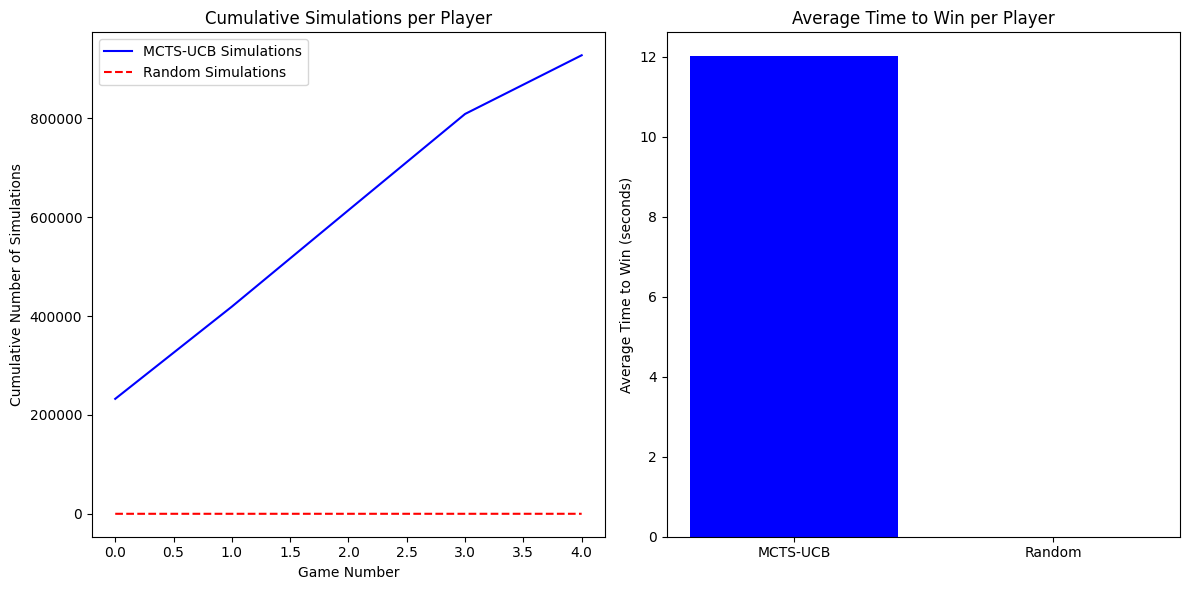

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tabulate import tabulate
from connect4_mcts import GameBoard, MCTS, Node

def evaluate_mcts_vs_random(num_games: int = 100):
    # Initialize counters for wins and draws
    mcts_wins = 0
    random_wins = 0
    draws = 0

    # Lists to store simulation data and computation times
    mcts_simulations = []  # Total simulations per game for MCTS
    random_simulations = []  # Total simulations per game for Random Player
    mcts_times = []  # Total computation time per game for MCTS
    random_times = []  # Total computation time per game for Random Player

    # Loop through the specified number of games
    for game_num in range(num_games):
        print(f"Game {game_num+1}/{num_games}")
        # Initialize the game board and MCTS algorithm
        game_board = GameBoard(cpu=1)
        monte_carlo = MCTS(symbol=1, t=3.0)

        # Start the timer for the current match
        match_start_time = time.time()  
        mcts_match_simulations = 0  # Reset simulation counter for MCTS
        random_match_simulations = 0  # Reset simulation counter for Random Player

        # Game loop
        while True:
            # Check if the game is over and determine the winner
            game_over, winner_id = game_board.check_win()
            if game_over:
                match_end_time = time.time()  
                match_time = match_end_time - match_start_time

                # Update win counters and store match time
                if winner_id == 1:
                    mcts_wins += 1
                    mcts_times.append(match_time)
                elif winner_id == 2:
                    random_wins += 1
                    random_times.append(match_time)
                else:
                    draws += 1

                # Store the total number of simulations for this match
                mcts_simulations.append(mcts_match_simulations)
                random_simulations.append(random_match_simulations)
                break

            # MCTS Player's turn
            if game_board.turn == 1: 
                # Create a root node for MCTS
                root = Node(parent=None, board=game_board.board.copy(), turn=1)
                move_start_time = time.time()
                # Compute the best move using MCTS
                move = monte_carlo.compute_move(root)
                move_time = time.time() - move_start_time

                # Handle the move returned by MCTS
                if move != (-1, -1):
                    # If move is a tuple (row, col), convert it to a column number
                    if isinstance(move, tuple) and len(move) == 2:
                        col = move[1] + 1
                    else:
                        # If move is already a column number
                        col = move + 1
                    
                    # Apply the move to the game board
                    game_board.apply_move(col)
                else:
                    # If MCTS fails to find a valid move, choose randomly
                    valid_moves = [col for col in range(7) if game_board.board[5, col] == 0]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Record the number of simulations for MCTS
                mcts_match_simulations += root.n
            # Random Player's turn
            else: 
                # Choose a random valid move
                valid_moves = [col for col in range(7) if game_board.board[5, col] == 0]
                if valid_moves:
                    col = np.random.choice(valid_moves) + 1
                    game_board.apply_move(col)
                
                # Increment the simulation counter for the Random Player
                random_match_simulations += 1

    # Calculate win rates and draw rate
    mcts_win_rate = (mcts_wins / num_games) * 100
    random_win_rate = (random_wins / num_games) * 100
    draw_rate = (draws / num_games) * 100

    # Create a summary table
    table = [
        ["MCTS-UCB Wins", mcts_wins, f"{mcts_win_rate:.1f}%"],
        ["Random Player Wins", random_wins, f"{random_win_rate:.1f}%"],
        ["Draws", draws, f"{draw_rate:.1f}%"]
    ]

    # Print the summary table
    print(tabulate(table, headers=["Metric", "Count", "Rate"], tablefmt="pretty"))

    # Plot the results
    plt.figure(figsize=(12, 6))

    # Cumulative simulations plot
    plt.subplot(1, 2, 1)
    plt.plot(np.cumsum(mcts_simulations), label="MCTS-UCB Simulations", color="blue")
    plt.plot(np.cumsum(random_simulations), label="Random Simulations", color="red", linestyle="--")
    plt.xlabel("Game Number")
    plt.ylabel("Cumulative Number of Simulations")
    plt.title("Cumulative Simulations per Player")
    plt.legend()

    # Bar plot for average time to win
    plt.subplot(1, 2, 2)
    avg_mcts_time = np.mean(mcts_times) if mcts_times else 0
    avg_random_time = np.mean(random_times) if random_times else 0
    plt.bar(["MCTS-UCB", "Random"], [avg_mcts_time, avg_random_time], color=["blue", "red"])
    plt.ylabel("Average Time to Win (seconds)")
    plt.title("Average Time to Win per Player")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Run the evaluation with 10 games
    evaluate_mcts_vs_random(num_games=5)

## 2.MCTS-UCB vs MCTS-RAVE

### Evaluation of RAVE vs MCTS-UCB in Connect4

This script evaluates the performance of the RAVE (Rapid Action Value Estimation) algorithm 
against the classic MCTS-UCB (Monte Carlo Tree Search with Upper Confidence Bound) in the 
game of Connect4. The goal is to compare the two algorithms in terms of win rates, 
computation efficiency, and overall performance.

#### Metrics Used:
1. **Win Rates**:
   - The percentage of games won by RAVE, MCTS-UCB, and the number of draws.

2. **Simulations**:
   - The number of simulations performed by each algorithm during the game.
   - Simulations represent the number of random playouts (rollouts) used to evaluate moves.

3. **Computation Time**:
   - The average time taken by each algorithm to compute a move.
   - This metric helps evaluate the efficiency of the algorithms.

4. **Efficiency**:
   - Simulations per second: How many simulations each algorithm can perform per second.
   - Wins per 1000 simulations: How effective the algorithms are at converting simulations into wins.

5. **Cumulative Simulations**:
   - The total number of simulations performed by each algorithm across all games.
   - This shows the overall computational effort of each algorithm.

6. **Move Time Distribution**:
   - The distribution of time taken per move for both algorithms.
   - This helps identify consistency in computation time.

#### Purpose of the Code:
- Compare the performance of RAVE and MCTS-UCB in a controlled environment.
- Analyze the trade-offs between computation time, simulations, and win rates.
- Provide insights into which algorithm is more efficient and effective for Connect4.

The results are displayed in tables and graphs for easy interpretation and saved to a file 
for further analysis.


Game 1/5
Game 2/5
Game 3/5
Game 4/5
Game 5/5

--- Algorithm Efficiency ---
+-----------+------------------------+
| Algorithm | Simulations per Second |
+-----------+------------------------+
|   RAVE    |        83971.5         |
| MCTS-UCB  |        108601.2        |
+-----------+------------------------+

--- Match Results ---
+---------------+-------+-------+
|    Metric     | Count | Rate  |
+---------------+-------+-------+
|   RAVE Wins   |   2   | 40.0% |
| MCTS-UCB Wins |   3   | 60.0% |
|     Draws     |   0   | 0.0%  |
+---------------+-------+-------+

--- Algorithm Performance ---
+-----------+---------------------+---------------------------+
| Algorithm | Average Simulations | Average Time per Move (s) |
+-----------+---------------------+---------------------------+
|   RAVE    |      252138.8       |           3.003           |
| MCTS-UCB  |      325917.4       |           3.001           |
+-----------+---------------------+---------------------------+


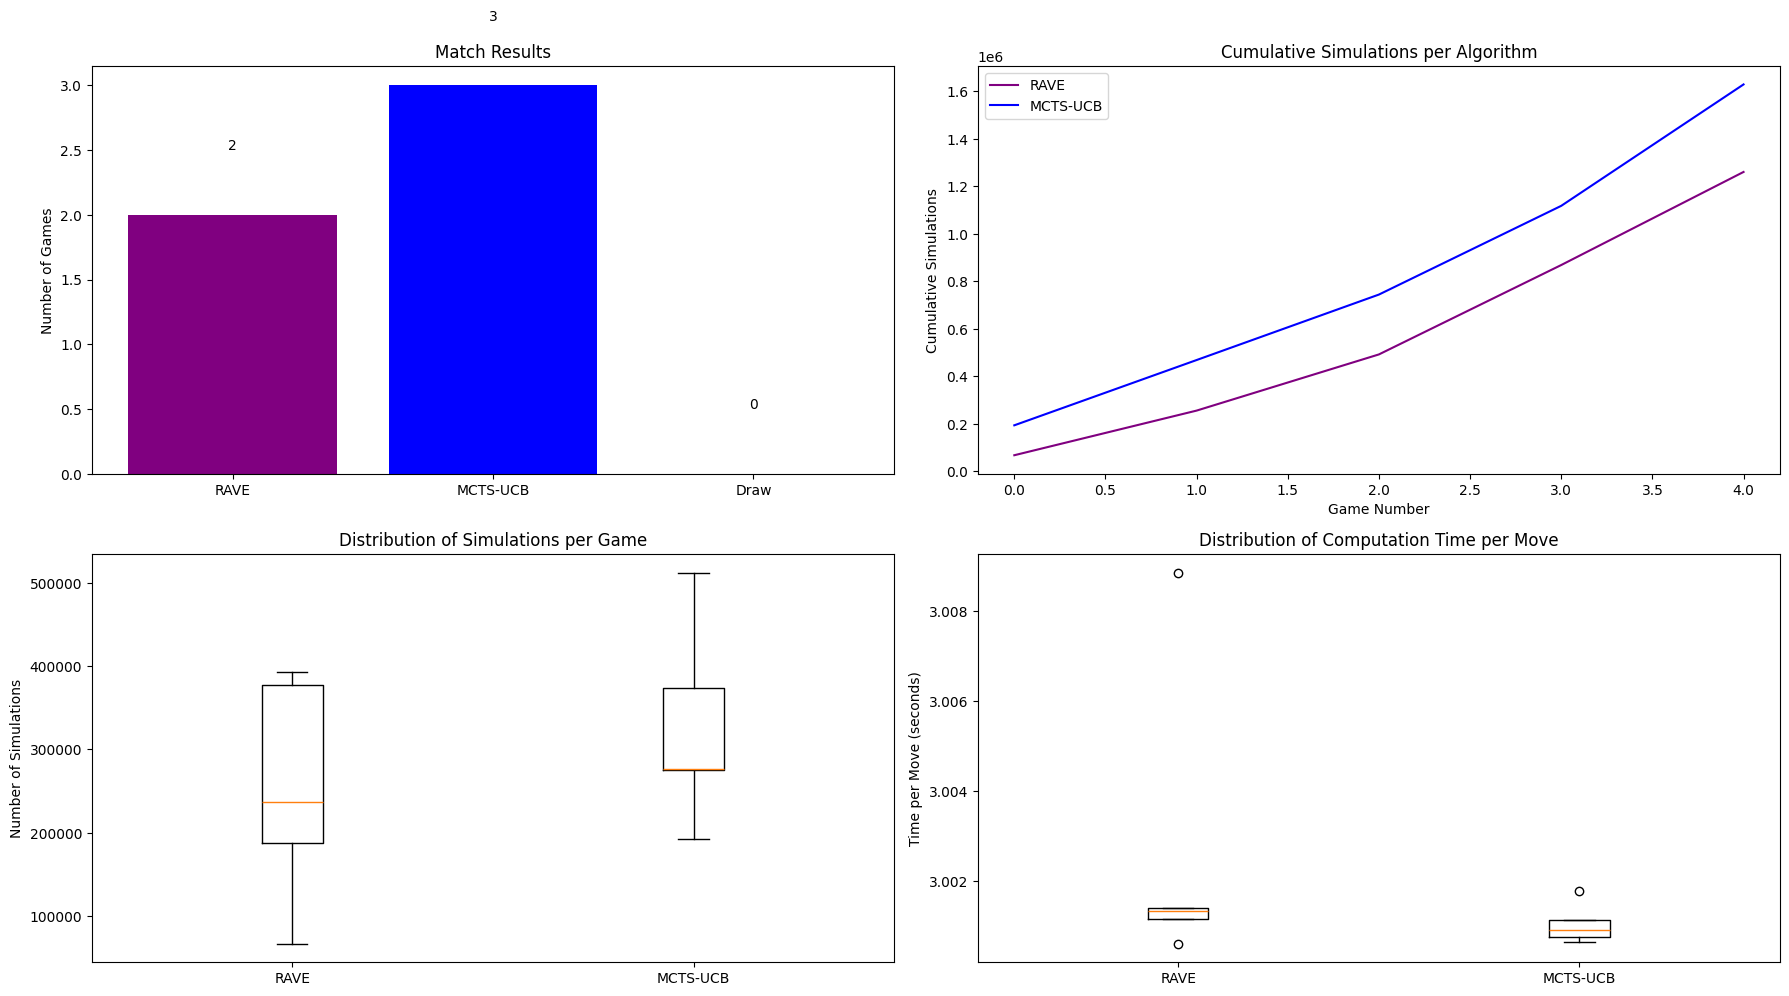

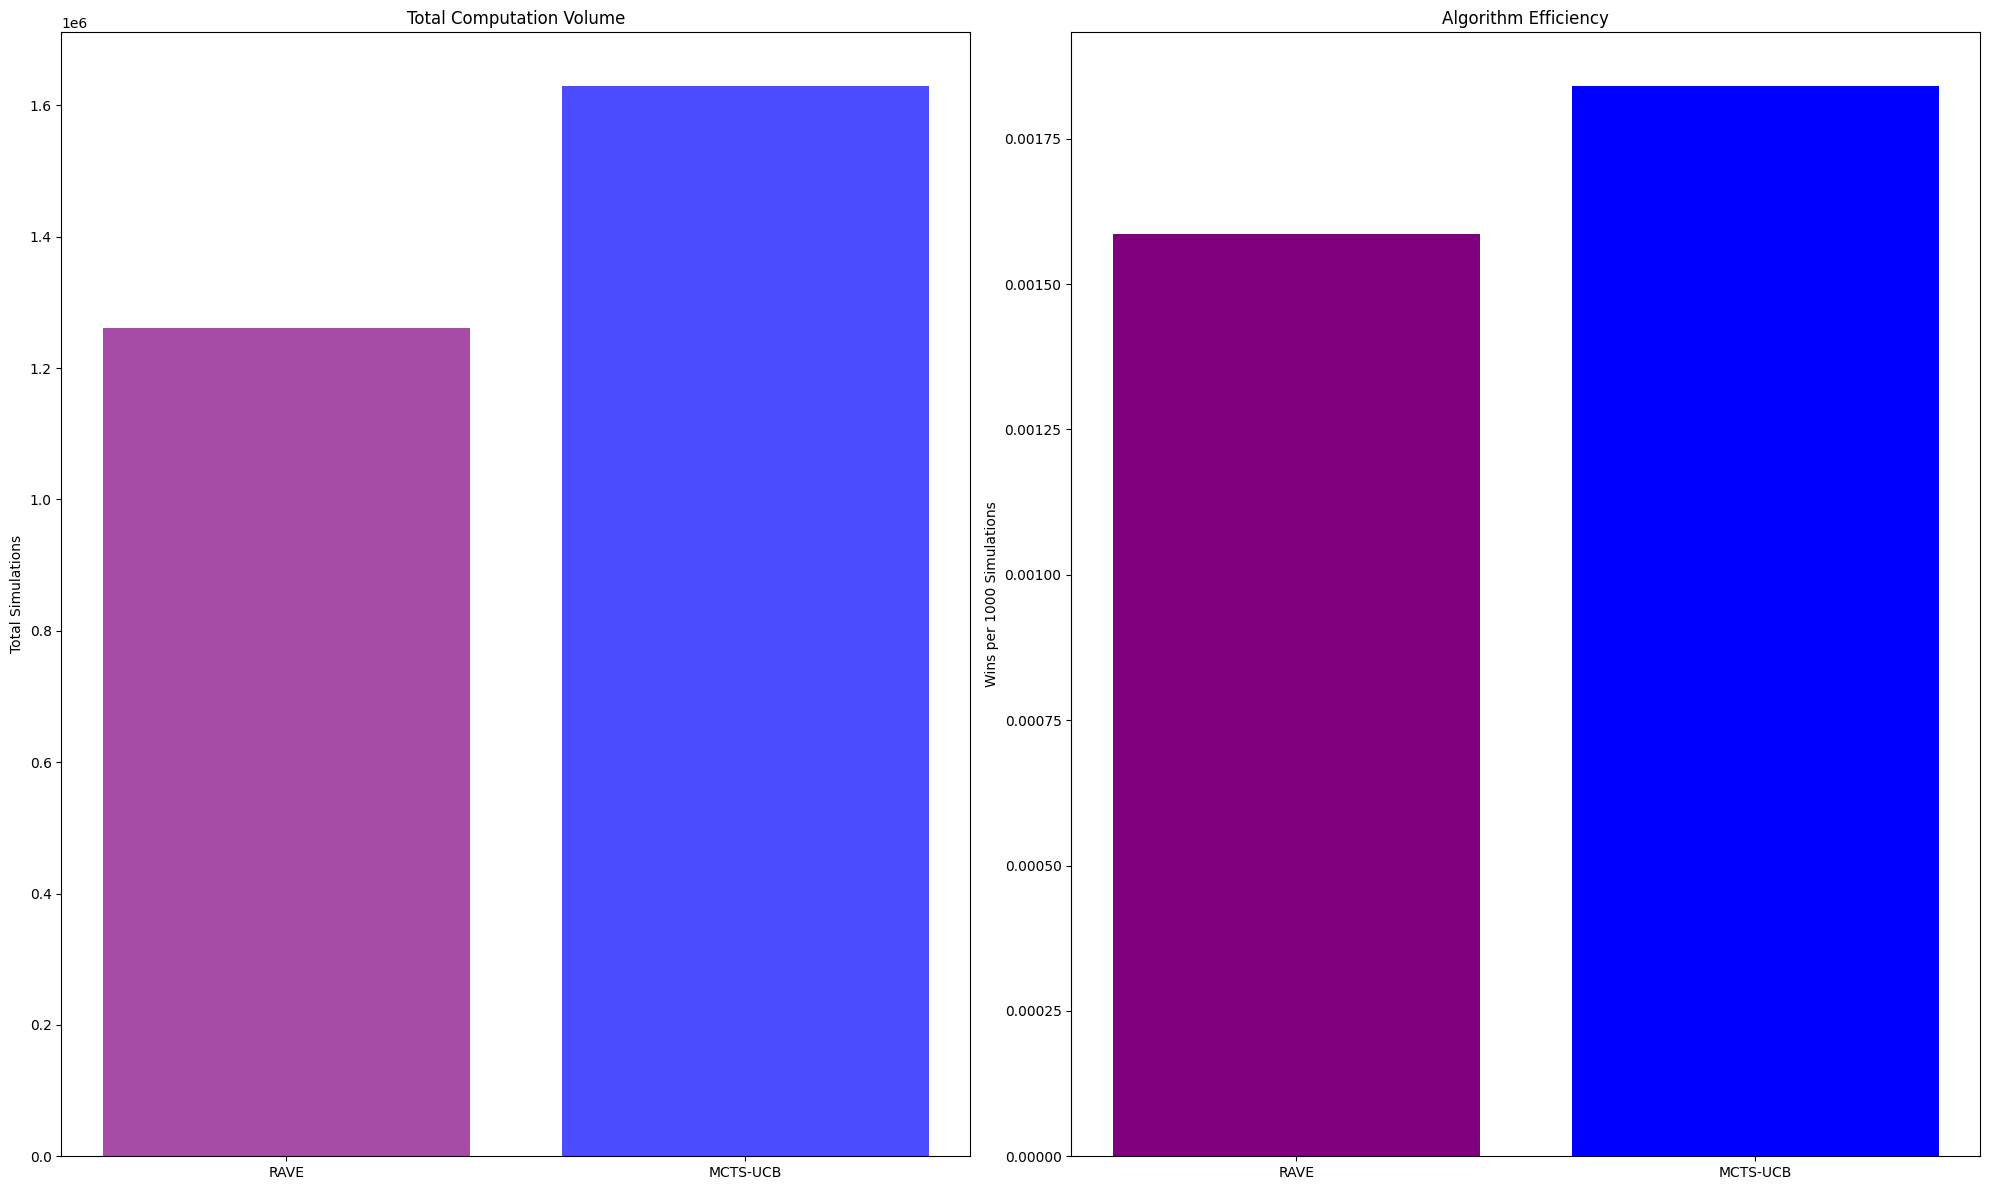

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tabulate import tabulate
from connect4_mcts import GameBoard as MCTSGameBoard, MCTS, Node as MCTSNode
from connect4_RAVE import GameBoard, RAVE, Node as RAVENode

def evaluate_rave_vs_mcts(num_games: int = 100, computation_time: float = 3.0):
    rave_wins = 0
    mcts_wins = 0
    draws = 0

    # To store data
    rave_simulations = []  # Number of simulations per match for RAVE
    mcts_simulations = []  # Number of simulations per match for MCTS
    rave_times = []  # Computation time per match for RAVE
    mcts_times = []  # Computation time per match for MCTS
    
    # Data for average time per move
    rave_move_times = []
    mcts_move_times = []

    # Alternate who starts first
    for game_num in range(num_games):
        print(f"Game {game_num+1}/{num_games}")
        
        # Alternate the first player
        if game_num % 2 == 0:
            rave_player, mcts_player = 1, 2
        else:
            rave_player, mcts_player = 2, 1
        
        game_board = GameBoard(cpu=1)  # Initialize the board
        
        # Initialize the algorithms
        rave = RAVE(symbol=rave_player, t=computation_time)
        mcts = MCTS(symbol=mcts_player, t=computation_time)

        # Statistics for this match
        match_start_time = time.time()
        rave_match_simulations = 0
        mcts_match_simulations = 0
        
        # Store move times
        rave_match_move_times = []
        mcts_match_move_times = []

        # Game loop
        while True:
            # Check if the game is over
            game_over, winner_id = game_board.check_win()
            if game_over:
                match_end_time = time.time()
                match_time = match_end_time - match_start_time

                # Record results
                if winner_id == rave_player:
                    rave_wins += 1
                    rave_times.append(match_time)
                elif winner_id == mcts_player:
                    mcts_wins += 1
                    mcts_times.append(match_time)
                else:
                    draws += 1

                # Record statistics for this match
                rave_simulations.append(rave_match_simulations)
                mcts_simulations.append(mcts_match_simulations)
                
                # Add average move times
                if rave_match_move_times:
                    rave_move_times.append(np.mean(rave_match_move_times))
                if mcts_match_move_times:
                    mcts_move_times.append(np.mean(mcts_match_move_times))
                
                break

            # RAVE player's turn
            if game_board.turn == rave_player:
                root = RAVENode(parent=None, board=game_board.board.copy(), turn=rave_player)
                move_start_time = time.time()
                move = rave.compute_move(root)
                move_time = time.time() - move_start_time
                rave_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Convert (row, col) coordinates to column number
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # If RAVE doesn't find a valid move, choose randomly
                    valid_moves = [col + 1 for col in range(7) if game_board.board[5, col] == 0]
                    if valid_moves:
                        col = np.random.choice(valid_moves)
                        game_board.apply_move(col)
                
                # Record the number of simulations
                rave_match_simulations += root.n
            
            # MCTS player's turn
            elif game_board.turn == mcts_player:
                root = MCTSNode(parent=None, board=game_board.board.copy(), turn=mcts_player)
                move_start_time = time.time()
                move = mcts.compute_move(root)
                move_time = time.time() - move_start_time
                mcts_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Handle MCTS return format
                    if isinstance(move, tuple) and len(move) == 2:
                        col = move[1] + 1
                    else:
                        col = move + 1
                    
                    game_board.apply_move(col)
                else:
                    # If MCTS doesn't find a valid move, choose randomly
                    valid_moves = [col + 1 for col in range(7) if game_board.board[5, col] == 0]
                    if valid_moves:
                        col = np.random.choice(valid_moves)
                        game_board.apply_move(col)
                
                # Record the number of simulations
                mcts_match_simulations += root.n

    # Calculate statistics
    rave_win_rate = (rave_wins / num_games) * 100
    mcts_win_rate = (mcts_wins / num_games) * 100
    draw_rate = (draws / num_games) * 100

    # Calculate averages
    avg_rave_simulations = np.mean(rave_simulations) if rave_simulations else 0
    avg_mcts_simulations = np.mean(mcts_simulations) if mcts_simulations else 0
    avg_rave_move_time = np.mean(rave_move_times) if rave_move_times else 0
    avg_mcts_move_time = np.mean(mcts_move_times) if mcts_move_times else 0

    # Create summary table
    table = [
        ["RAVE Wins", rave_wins, f"{rave_win_rate:.1f}%"],
        ["MCTS-UCB Wins", mcts_wins, f"{mcts_win_rate:.1f}%"],
        ["Draws", draws, f"{draw_rate:.1f}%"]
    ]

    # Performance table
    performance_table = [
        ["Algorithm", "Average Simulations", "Average Time per Move (s)"],
        ["RAVE", f"{avg_rave_simulations:.1f}", f"{avg_rave_move_time:.3f}"],
        ["MCTS-UCB", f"{avg_mcts_simulations:.1f}", f"{avg_mcts_move_time:.3f}"]
    ]

    # Calculate efficiency (simulations per second)
    if avg_rave_move_time > 0 and avg_mcts_move_time > 0:
        rave_efficiency_sims = avg_rave_simulations / avg_rave_move_time
        mcts_efficiency_sims = avg_mcts_simulations / avg_mcts_move_time
        efficiency_table = [
            ["Algorithm", "Simulations per Second"],
            ["RAVE", f"{rave_efficiency_sims:.1f}"],
            ["MCTS-UCB", f"{mcts_efficiency_sims:.1f}"]
        ]
        print("\n--- Algorithm Efficiency ---")
        print(tabulate(efficiency_table, headers="firstrow", tablefmt="pretty"))

    # Display tables
    print("\n--- Match Results ---")
    print(tabulate(table, headers=["Metric", "Count", "Rate"], tablefmt="pretty"))
    
    print("\n--- Algorithm Performance ---")
    print(tabulate(performance_table, headers="firstrow", tablefmt="pretty"))

    # Graphs
    plt.figure(figsize=(18, 10))

    # Wins graph
    plt.subplot(2, 2, 1)
    plt.bar(["RAVE", "MCTS-UCB", "Draw"], [rave_wins, mcts_wins, draws], 
            color=["purple", "blue", "gray"])
    plt.ylabel("Number of Games")
    plt.title("Match Results")
    for i, v in enumerate([rave_wins, mcts_wins, draws]):
        plt.text(i, v + 0.5, str(v), ha='center')

    # Cumulative simulations graph
    plt.subplot(2, 2, 2)
    plt.plot(np.cumsum(rave_simulations), label="RAVE", color="purple")
    plt.plot(np.cumsum(mcts_simulations), label="MCTS-UCB", color="blue")
    plt.xlabel("Game Number")
    plt.ylabel("Cumulative Simulations")
    plt.title("Cumulative Simulations per Algorithm")
    plt.legend()
    
    # Average simulations per game graph
    plt.subplot(2, 2, 3)
    if rave_simulations and mcts_simulations:
        plt.boxplot([rave_simulations, mcts_simulations], tick_labels=["RAVE", "MCTS-UCB"])
        plt.ylabel("Number of Simulations")
        plt.ylabel("Number of Simulations")
        plt.title("Distribution of Simulations per Game")
    
    # Average move time graph
    plt.subplot(2, 2, 4)
    if rave_move_times and mcts_move_times:
        plt.boxplot([rave_move_times, mcts_move_times], tick_labels=["RAVE", "MCTS-UCB"])        
        plt.ylabel("Time per Move (seconds)")
        plt.title("Distribution of Computation Time per Move")

    plt.tight_layout()
    plt.show()
    
    # Additional graph: Efficiency (wins based on simulations)
    plt.figure(figsize=(20, 12))     
    # Graph 1: Wins based on total number of simulations
    plt.subplot(1, 2, 1)
    total_rave_sims = sum(rave_simulations)
    total_mcts_sims = sum(mcts_simulations)
    plt.bar(["RAVE", "MCTS-UCB"], [total_rave_sims, total_mcts_sims], alpha=0.7, color=["purple", "blue"])
    plt.ylabel("Total Simulations")
    plt.title("Total Computation Volume")
    
    # Graph 2: Efficiency (wins per 1000 simulations)
    plt.subplot(1, 2, 2)
    rave_win_efficiency = (rave_wins / max(1, total_rave_sims)) * 1000
    mcts_win_efficiency = (mcts_wins / max(1, total_mcts_sims)) * 1000
    plt.bar(["RAVE", "MCTS-UCB"], [rave_win_efficiency, mcts_win_efficiency], color=["purple", "blue"])
    plt.ylabel("Wins per 1000 Simulations")
    plt.title("Algorithm Efficiency")
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    evaluate_rave_vs_mcts(num_games=5, computation_time=3.0)

## 3.MCTS-UCB vs MCTS-GRAVE

### Evaluation of GRAVE vs MCTS-UCB in Connect4

This script evaluates the performance of the **GRAVE** (Graph Retrieval and Value Estimation) algorithm against the classic **MCTS-UCB** (Monte Carlo Tree Search with Upper Confidence Bound) algorithm in the game of Connect4. The goal is to compare the two algorithms in terms of win rates, computational efficiency, and overall performance.


#### Metrics Used:
1. **Win Rates**:
   - The percentage of games won by GRAVE, MCTS-UCB, and the number of draws.

2. **Simulations**:
   - The number of simulations performed by each algorithm during a game.
   - Simulations represent the number of random playouts (rollouts) used to evaluate moves.

3. **Computation Time**:
   - The average time taken by each algorithm to compute a move.
   - This metric helps evaluate the efficiency of the algorithms.

4. **Efficiency**:
   - Simulations per second: How many simulations each algorithm can perform per second.
   - Wins per 1000 simulations: How effective the algorithms are at converting simulations into wins.

5. **Cumulative Simulations**:
   - The total number of simulations performed by each algorithm across all games.
   - This shows the overall computational effort of each algorithm.

6. **Move Time Distribution**:
   - The distribution of time taken per move for both algorithms.
   - This helps identify consistency in computation time.


#### Purpose of the Code:
- Compare the performance of GRAVE and MCTS-UCB in a controlled environment.
- Analyze the trade-offs between computation time, simulations, and win rates.
- Provide insights into which algorithm is more efficient and effective for Connect4.

The results are displayed in tables and graphs for easy interpretation and saved for further analysis.

Game 1/5
Game 2/5
Game 3/5
Game 4/5
Game 5/5

--- Algorithm Efficiency ---
+-----------+------------------------+
| Algorithm | Simulations per Second |
+-----------+------------------------+
|   GRAVE   |        79673.1         |
| MCTS-UCB  |        119271.2        |
+-----------+------------------------+

--- Match Results ---
+---------------+-------+-------+
|    Metric     | Count | Rate  |
+---------------+-------+-------+
|  GRAVE Wins   |   0   | 0.0%  |
| MCTS-UCB Wins |   3   | 60.0% |
|     Draws     |   2   | 40.0% |
+---------------+-------+-------+

--- Algorithm Performance ---
+-----------+---------------------+---------------------------+
| Algorithm | Average Simulations | Average Time per Move (s) |
+-----------+---------------------+---------------------------+
| Algorithm | Average Simulations | Average Time per Move (s) |
|   GRAVE   |      239251.8       |           3.003           |
| MCTS-UCB  |      358272.2       |           3.004           |
+-----------+--

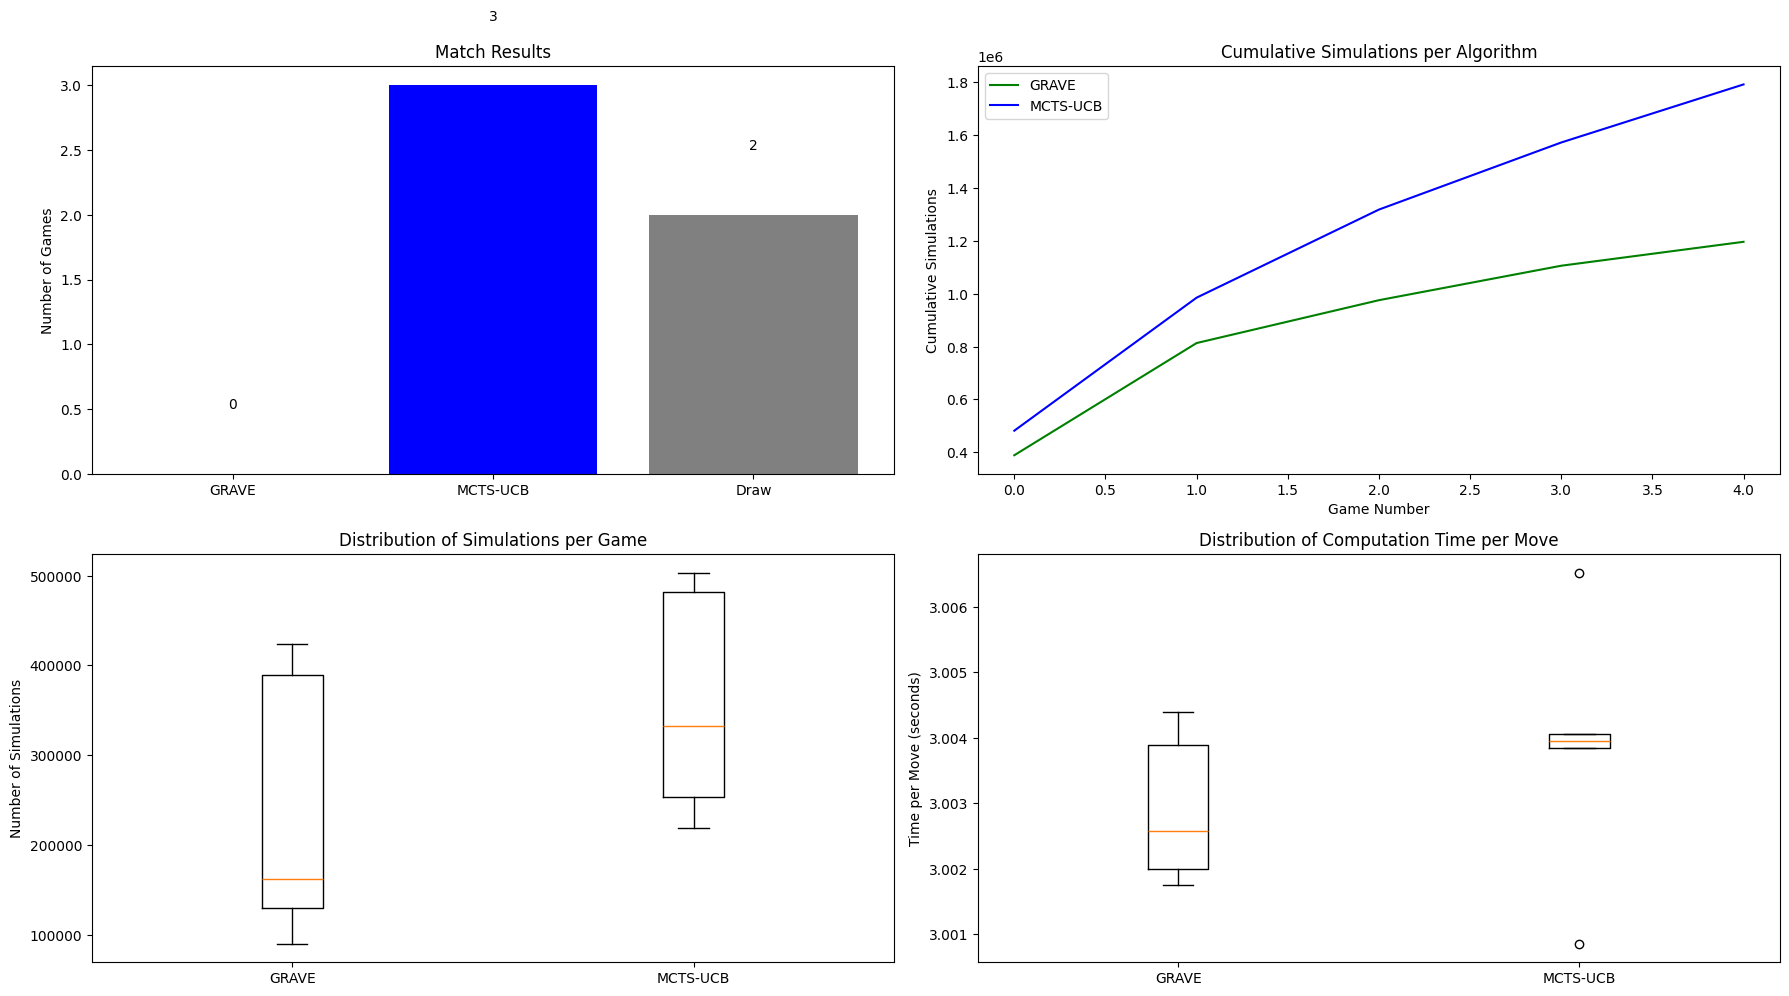

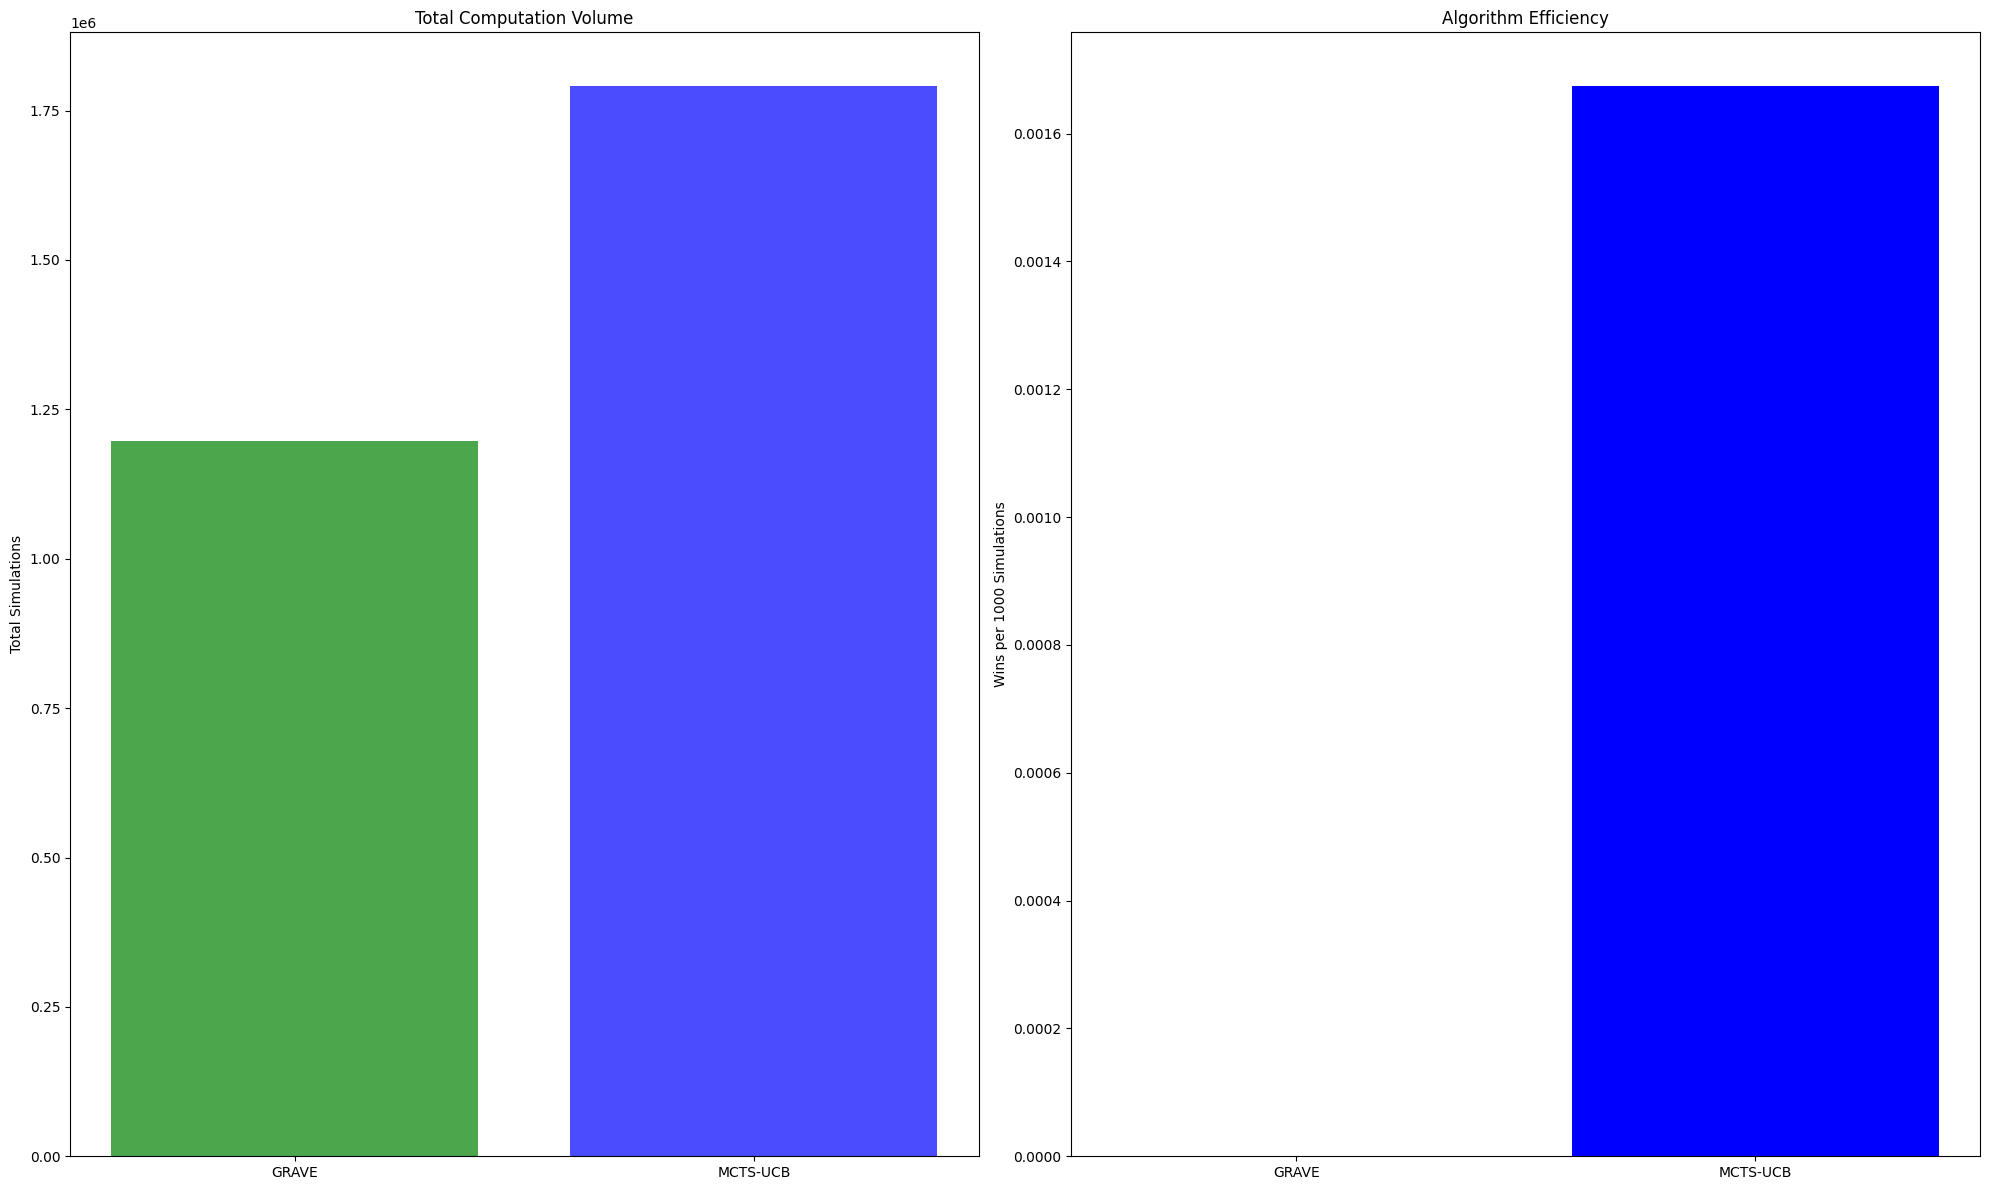

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tabulate import tabulate
from connect4_mcts import GameBoard as MCTSGameBoard, MCTS, Node as MCTSNode
from connect4_GRAVE import GameBoard, GRAVE, Node as GRAVENode

def evaluate_grave_vs_mcts(num_games: int = 100, computation_time: float = 3.0):
    grave_wins = 0
    mcts_wins = 0
    draws = 0

    # To store data
    grave_simulations = []  # Number of simulations per match for GRAVE
    mcts_simulations = []  # Number of simulations per match for MCTS
    grave_times = []  # Computation time per match for GRAVE
    mcts_times = []  # Computation time per match for MCTS
    
    # Data for average time per move
    grave_move_times = []
    mcts_move_times = []

    # Alternate who starts first
    for game_num in range(num_games):
        print(f"Game {game_num+1}/{num_games}")
        
        # Alternate the first player
        if game_num % 2 == 0:
            grave_player, mcts_player = 1, 2
        else:
            grave_player, mcts_player = 2, 1
        
        game_board = GameBoard(cpu=1)  # Initialize the board
        
        # Initialize the algorithms
        grave = GRAVE(symbol=grave_player, t=computation_time)
        mcts = MCTS(symbol=mcts_player, t=computation_time)

        # Statistics for this match
        match_start_time = time.time()
        grave_match_simulations = 0
        mcts_match_simulations = 0
        
        # Store move times
        grave_match_move_times = []
        mcts_match_move_times = []

        # Game loop
        while True:
            # Check if the game is over
            game_over, winner_id = game_board.check_win()
            if game_over:
                match_end_time = time.time()
                match_time = match_end_time - match_start_time

                # Record results
                if winner_id == grave_player:
                    grave_wins += 1
                    grave_times.append(match_time)
                elif winner_id == mcts_player:
                    mcts_wins += 1
                    mcts_times.append(match_time)
                else:
                    draws += 1

                # Record statistics for this match
                grave_simulations.append(grave_match_simulations)
                mcts_simulations.append(mcts_match_simulations)
                
                # Add average move times
                if grave_match_move_times:
                    grave_move_times.append(np.mean(grave_match_move_times))
                if mcts_match_move_times:
                    mcts_move_times.append(np.mean(mcts_match_move_times))
                
                break

            # GRAVE player's turn
            if game_board.turn == grave_player:
                root = GRAVENode(parent=None, board=game_board.board.copy(), turn=grave_player)
                move_start_time = time.time()
                move = grave.compute_move(root)
                move_time = time.time() - move_start_time
                grave_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Convert (row, col) coordinates to column number
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # If GRAVE doesn't find a valid move, choose randomly
                    valid_moves = [col + 1 for col in range(7) if game_board.board[5, col] == 0]
                    if valid_moves:
                        col = np.random.choice(valid_moves)
                        game_board.apply_move(col)
                
                # Record the number of simulations
                grave_match_simulations += root.n
            
            # MCTS player's turn
            elif game_board.turn == mcts_player:
                root = MCTSNode(parent=None, board=game_board.board.copy(), turn=mcts_player)
                move_start_time = time.time()
                move = mcts.compute_move(root)
                move_time = time.time() - move_start_time
                mcts_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Handle MCTS return format
                    if isinstance(move, tuple) and len(move) == 2:
                        col = move[1] + 1
                    else:
                        col = move + 1
                    
                    game_board.apply_move(col)
                else:
                    # If MCTS doesn't find a valid move, choose randomly
                    valid_moves = [col + 1 for col in range(7) if game_board.board[5, col] == 0]
                    if valid_moves:
                        col = np.random.choice(valid_moves)
                        game_board.apply_move(col)
                
                # Record the number of simulations
                mcts_match_simulations += root.n

    # Calculate statistics
    grave_win_rate = (grave_wins / num_games) * 100
    mcts_win_rate = (mcts_wins / num_games) * 100
    draw_rate = (draws / num_games) * 100

    # Calculate averages
    avg_grave_simulations = np.mean(grave_simulations) if grave_simulations else 0
    avg_mcts_simulations = np.mean(mcts_simulations) if mcts_simulations else 0
    avg_grave_move_time = np.mean(grave_move_times) if grave_move_times else 0
    avg_mcts_move_time = np.mean(mcts_move_times) if mcts_move_times else 0

    # Create summary table
    table = [
        ["GRAVE Wins", grave_wins, f"{grave_win_rate:.1f}%"],
        ["MCTS-UCB Wins", mcts_wins, f"{mcts_win_rate:.1f}%"],
        ["Draws", draws, f"{draw_rate:.1f}%"]
    ]

    # Performance table
    performance_table = [
        ["Algorithm", "Average Simulations", "Average Time per Move (s)"],
        ["GRAVE", f"{avg_grave_simulations:.1f}", f"{avg_grave_move_time:.3f}"],
        ["MCTS-UCB", f"{avg_mcts_simulations:.1f}", f"{avg_mcts_move_time:.3f}"]
    ]

    # Calculate efficiency (simulations per second)
    if avg_grave_move_time > 0 and avg_mcts_move_time > 0:
        grave_efficiency_sims = avg_grave_simulations / avg_grave_move_time
        mcts_efficiency_sims = avg_mcts_simulations / avg_mcts_move_time
        efficiency_table = [
            ["Algorithm", "Simulations per Second"],
            ["GRAVE", f"{grave_efficiency_sims:.1f}"],
            ["MCTS-UCB", f"{mcts_efficiency_sims:.1f}"]
        ]
        print("\n--- Algorithm Efficiency ---")
        print(tabulate(efficiency_table, headers="firstrow", tablefmt="pretty"))

    # Display tables
    print("\n--- Match Results ---")
    print(tabulate(table, headers=["Metric", "Count", "Rate"], tablefmt="pretty"))
    
    print("\n--- Algorithm Performance ---")
    print(tabulate(performance_table, headers=["Algorithm", "Average Simulations", "Average Time per Move (s)"], tablefmt="pretty"))

    # Graphs
    plt.figure(figsize=(18, 10))

    # Wins graph
    plt.subplot(2, 2, 1)
    plt.bar(["GRAVE", "MCTS-UCB", "Draw"], [grave_wins, mcts_wins, draws], 
            color=["green", "blue", "gray"])
    plt.ylabel("Number of Games")
    plt.title("Match Results")
    for i, v in enumerate([grave_wins, mcts_wins, draws]):
        plt.text(i, v + 0.5, str(v), ha='center')

    # Cumulative simulations graph
    plt.subplot(2, 2, 2)
    plt.plot(np.cumsum(grave_simulations), label="GRAVE", color="green")
    plt.plot(np.cumsum(mcts_simulations), label="MCTS-UCB", color="blue")
    plt.xlabel("Game Number")
    plt.ylabel("Cumulative Simulations")
    plt.title("Cumulative Simulations per Algorithm")
    plt.legend()
    
    # Average simulations per game graph
    plt.subplot(2, 2, 3)
    if grave_simulations and mcts_simulations:
        plt.boxplot([grave_simulations, mcts_simulations], tick_labels=["GRAVE", "MCTS-UCB"])
        plt.ylabel("Number of Simulations")
        plt.title("Distribution of Simulations per Game")
    
    # Average move time graph
    plt.subplot(2, 2, 4)
    if grave_move_times and mcts_move_times:
        plt.boxplot([grave_move_times, mcts_move_times], tick_labels=["GRAVE", "MCTS-UCB"])        
        plt.ylabel("Time per Move (seconds)")
        plt.title("Distribution of Computation Time per Move")

    plt.tight_layout()
    plt.show()
    


    # Additional graph: Efficiency (wins based on simulations)
    plt.figure(figsize=(20, 12))     
    # Graph 1: Wins based on total number of simulations
    plt.subplot(1, 2, 1)
    total_grave_sims = sum(grave_simulations)
    total_mcts_sims = sum(mcts_simulations)
    plt.bar(["GRAVE", "MCTS-UCB"], [total_grave_sims, total_mcts_sims], alpha=0.7, color=["green", "blue"])
    plt.ylabel("Total Simulations")
    plt.title("Total Computation Volume")
    
    # Graph 2: Efficiency (wins per 1000 simulations)
    plt.subplot(1, 2, 2)
    grave_win_efficiency = (grave_wins / max(1, total_grave_sims)) * 1000
    mcts_win_efficiency = (mcts_wins / max(1, total_mcts_sims)) * 1000
    plt.bar(["GRAVE", "MCTS-UCB"], [grave_win_efficiency, mcts_win_efficiency], color=["green", "blue"])
    plt.ylabel("Wins per 1000 Simulations")
    plt.title("Algorithm Efficiency")

    plt.tight_layout()
    plt.show()

    

if __name__ == "__main__":
    evaluate_grave_vs_mcts(num_games=5, computation_time=3.0)

## 4.MCTS-UCB vs MCTS-AMAF

### Evaluation of AMAF vs MCTS-UCB in Connect4

This script evaluates the performance of the **AMAF** (All Moves As First) algorithm against the classic **MCTS-UCB** (Monte Carlo Tree Search with Upper Confidence Bound) algorithm in the game of Connect4. The goal is to compare the two algorithms in terms of win rates, computational efficiency, and overall performance.


#### Metrics Used:
1. **Win Rates**:
   - The percentage of games won by GRAVE, MCTS-UCB, and the number of draws.

2. **Simulations**:
   - The number of simulations performed by each algorithm during a game.
   - Simulations represent the number of random playouts (rollouts) used to evaluate moves.

3. **Computation Time**:
   - The average time taken by each algorithm to compute a move.
   - This metric helps evaluate the efficiency of the algorithms.

4. **Efficiency**:
   - Simulations per second: How many simulations each algorithm can perform per second.
   - Wins per 1000 simulations: How effective the algorithms are at converting simulations into wins.

5. **Cumulative Simulations**:
   - The total number of simulations performed by each algorithm across all games.
   - This shows the overall computational effort of each algorithm.

6. **Move Time Distribution**:
   - The distribution of time taken per move for both algorithms.
   - This helps identify consistency in computation time.


#### Purpose of the Code:
- Compare the performance of AMAF and MCTS-UCB in a controlled environment.
- Analyze the trade-offs between computation time, simulations, and win rates.
- Provide insights into which algorithm is more efficient and effective for Connect4.

The results are displayed in tables and graphs for easy interpretation and saved for further analysis.

Game 1/5
Game 2/5
Game 3/5
Game 4/5
Game 5/5

--- Match Results ---
+---------------+-------+--------+
|    Metric     | Count |  Rate  |
+---------------+-------+--------+
|   AMAF Wins   |   0   |  0.0%  |
| MCTS-UCB Wins |   5   | 100.0% |
|     Draws     |   0   |  0.0%  |
+---------------+-------+--------+

--- Algorithm Performance ---
+-----------+---------------------+---------------------------+
| Algorithm | Average Simulations | Average Time per Move (s) |
+-----------+---------------------+---------------------------+
|   AMAF    |      155477.2       |           3.003           |
| MCTS-UCB  |      283516.6       |           3.002           |
+-----------+---------------------+---------------------------+


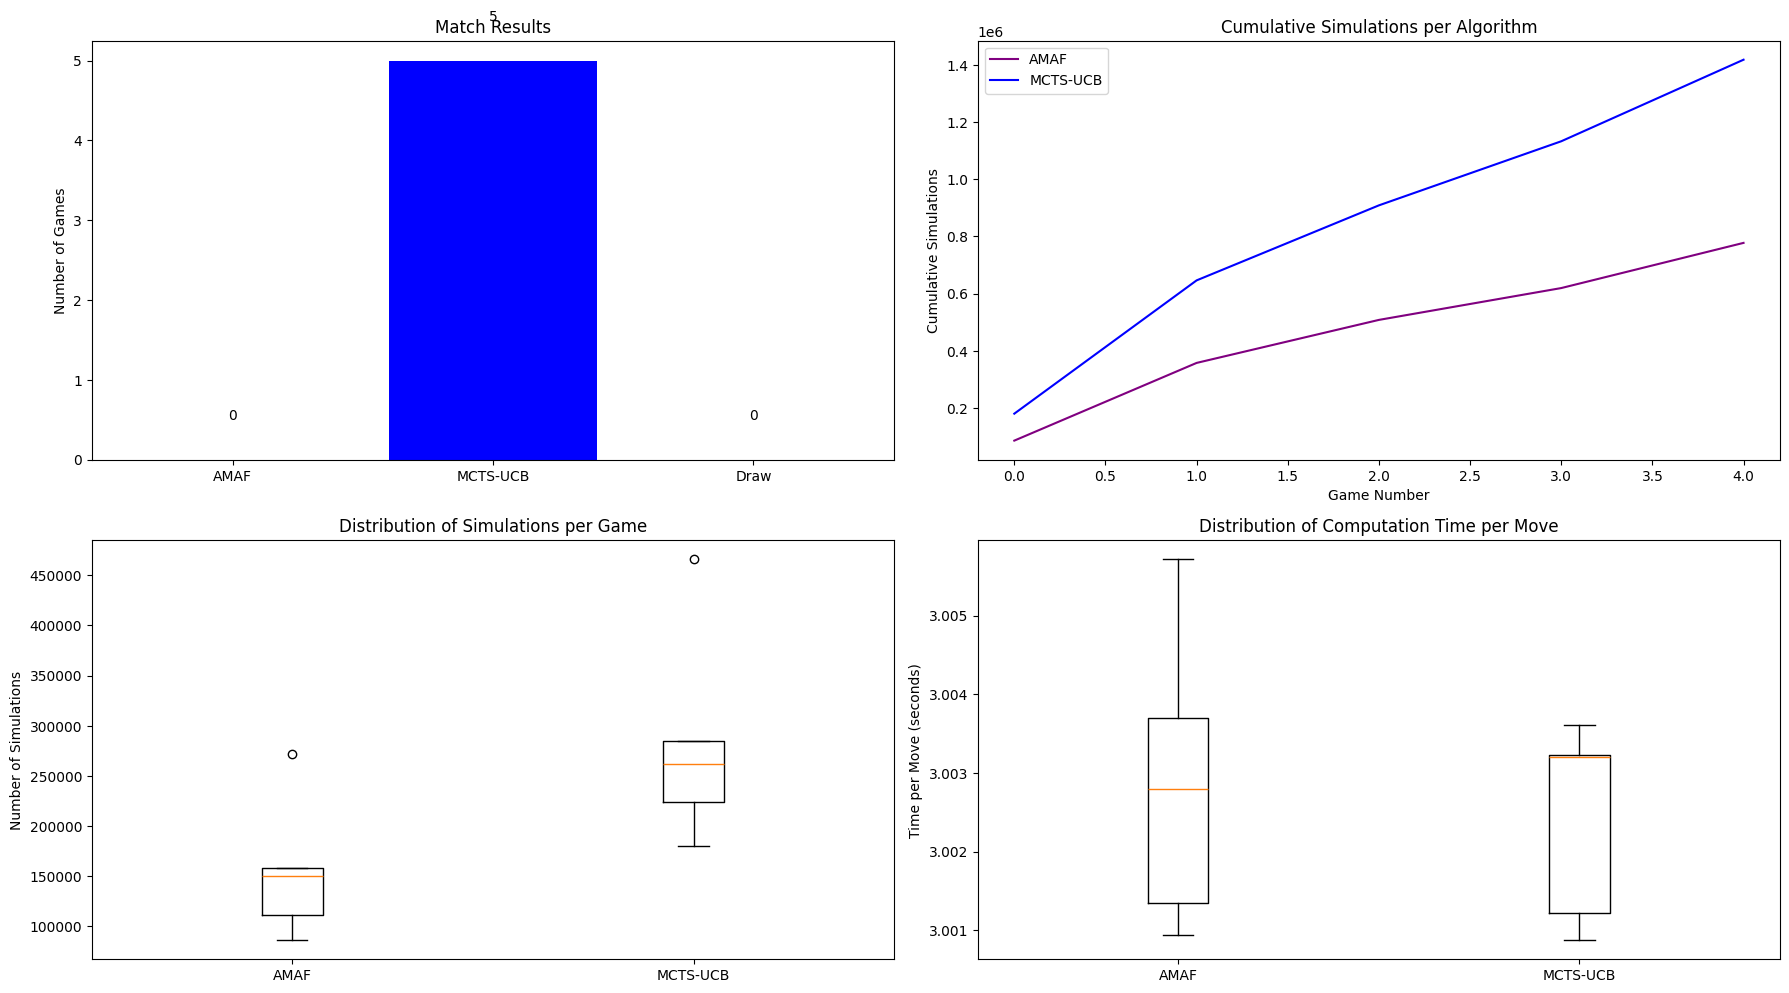

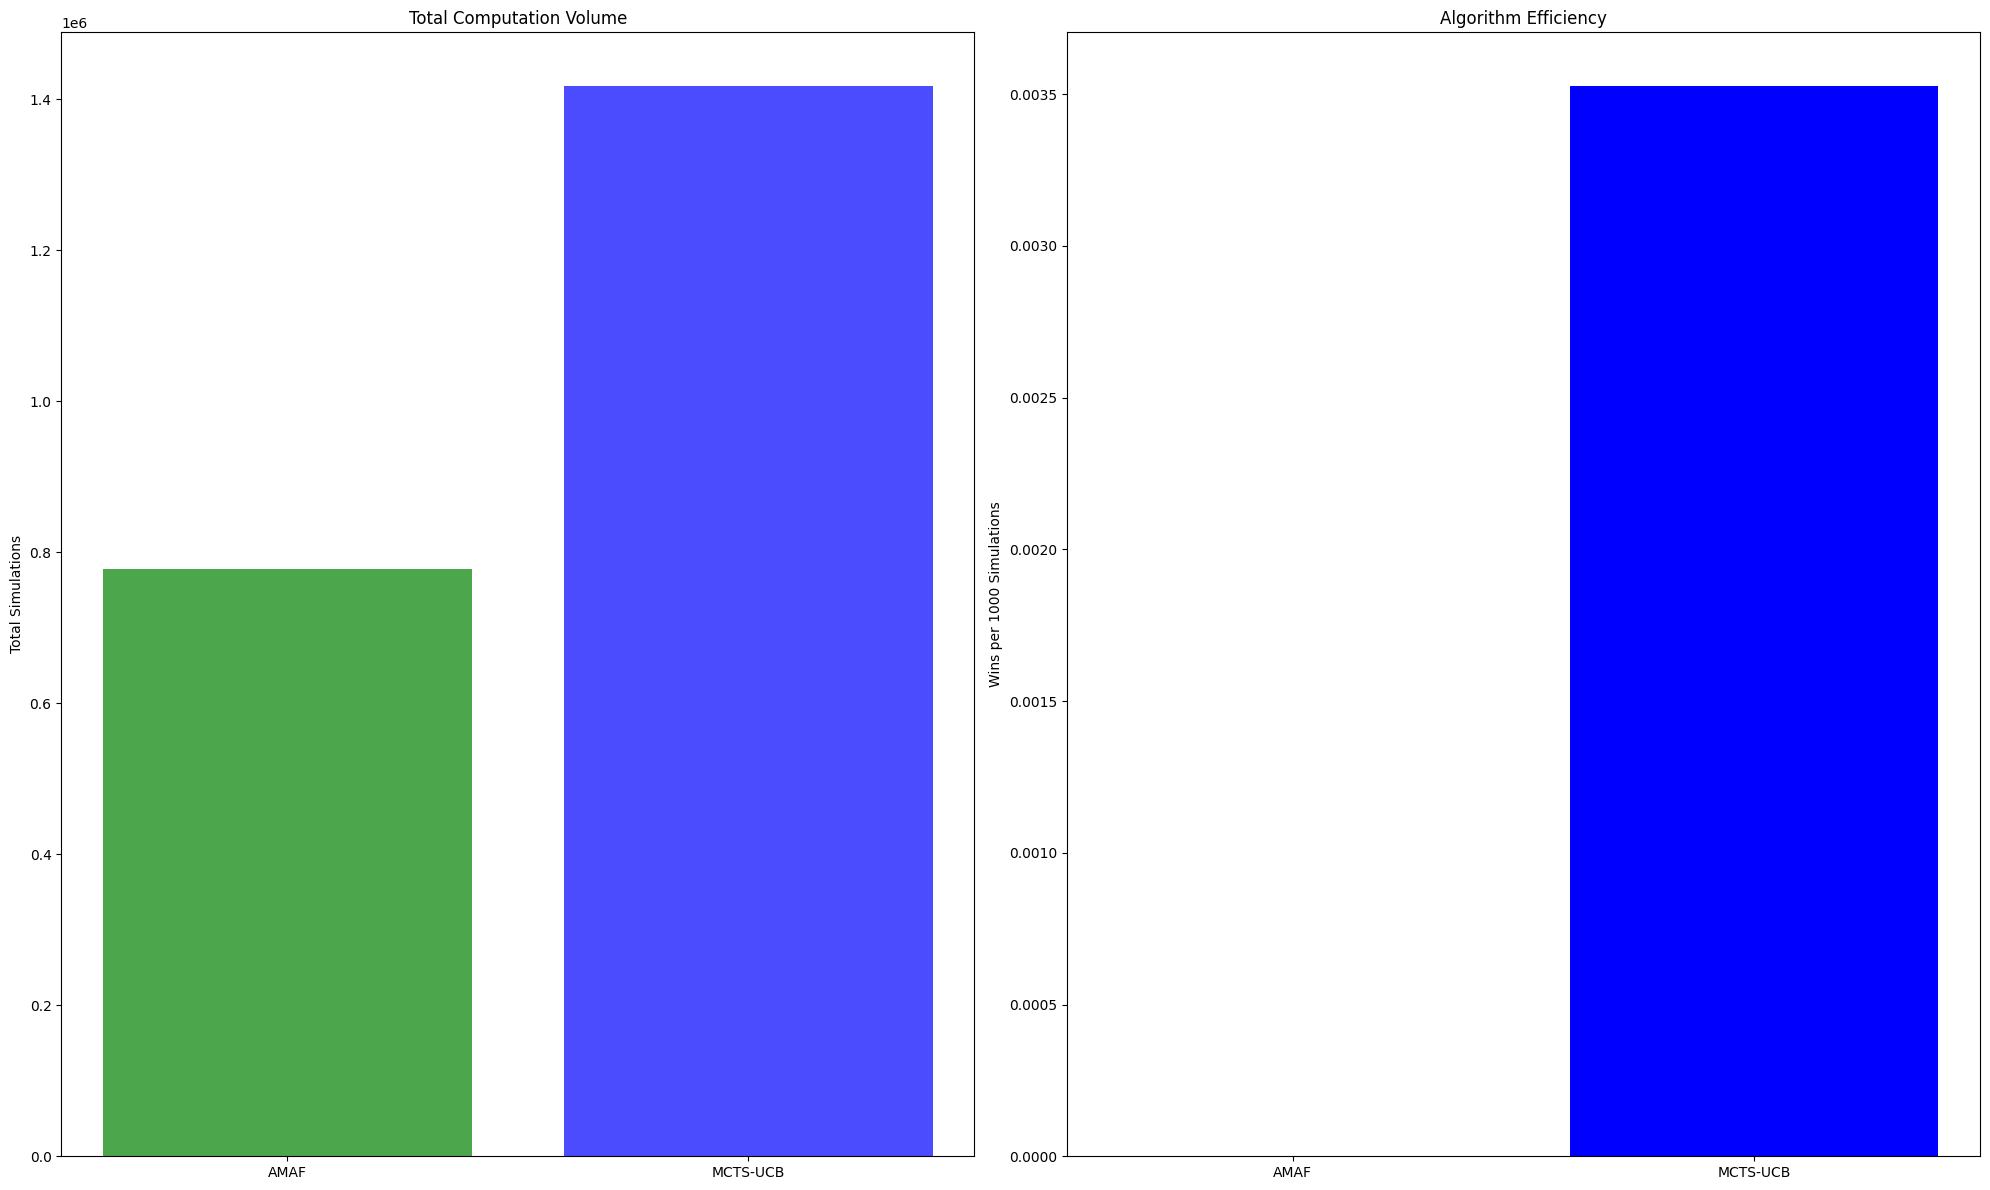

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tabulate import tabulate
from connect4_mcts import GameBoard, MCTS, Node as MCTSNode
from connect4_AMAF import AMAF, Node as AMAFNode

def evaluate_amaf_vs_mcts(num_games: int = 100, computation_time: float = 3.0):
    amaf_wins = 0
    mcts_wins = 0
    draws = 0

    # To store data
    amaf_simulations = []  # Number of simulations per match for AMAF
    mcts_simulations = []  # Number of simulations per match for MCTS
    amaf_times = []  # Computation time per match for AMAF
    mcts_times = []  # Computation time per match for MCTS
    
    # Data for average time per move
    amaf_move_times = []
    mcts_move_times = []

    # Alternate who starts first
    for game_num in range(num_games):
        print(f"Game {game_num+1}/{num_games}")
        
        # Alternate the first player
        if game_num % 2 == 0:
            amaf_player, mcts_player = 1, 2
        else:
            amaf_player, mcts_player = 2, 1
        
        game_board = GameBoard(cpu=1)  # Initialize the board
        
        # Initialize the algorithms
        amaf = AMAF(symbol=amaf_player, t=computation_time)
        mcts = MCTS(symbol=mcts_player, t=computation_time)

        # Statistics for this match
        match_start_time = time.time()
        amaf_match_simulations = 0
        mcts_match_simulations = 0
        
        # Store move times
        amaf_match_move_times = []
        mcts_match_move_times = []

        # Game loop
        while True:
            # Check if the game is over
            game_over, winner_id = game_board.check_win()
            if game_over:
                match_end_time = time.time()
                match_time = match_end_time - match_start_time

                # Record results
                if winner_id == amaf_player:
                    amaf_wins += 1
                    amaf_times.append(match_time)
                elif winner_id == mcts_player:
                    mcts_wins += 1
                    mcts_times.append(match_time)
                else:
                    draws += 1

                # Record statistics for this match
                amaf_simulations.append(amaf_match_simulations)
                mcts_simulations.append(mcts_match_simulations)
                
                # Add average move times
                if amaf_match_move_times:
                    amaf_move_times.append(np.mean(amaf_match_move_times))
                if mcts_match_move_times:
                    mcts_move_times.append(np.mean(mcts_match_move_times))
                
                break

            # AMAF player's turn
            if game_board.turn == amaf_player:
                root = AMAFNode(parent=None, board=game_board.board.copy(), turn=amaf_player)
                move_start_time = time.time()
                move = amaf.compute_move(root)
                move_time = time.time() - move_start_time
                amaf_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Convert (row, col) coordinates to column number
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # If AMAF doesn't find a valid move, choose randomly
                    valid_moves = [col for col in range(7) if np.any(game_board.board[:, col] == 0)]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Record the number of simulations
                amaf_match_simulations += root.n
            
            # MCTS player's turn
            elif game_board.turn == mcts_player:
                root = MCTSNode(parent=None, board=game_board.board.copy(), turn=mcts_player)
                move_start_time = time.time()
                move = mcts.compute_move(root)
                move_time = time.time() - move_start_time
                mcts_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Handle MCTS return format
                    if isinstance(move, tuple) and len(move) == 2:
                        col = move[1] + 1
                    else:
                        col = move + 1
                    
                    game_board.apply_move(col)
                else:
                    # If MCTS doesn't find a valid move, choose randomly
                    valid_moves = [col for col in range(7) if np.any(game_board.board[:, col] == 0)]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Record the number of simulations
                mcts_match_simulations += root.n

    # Calculate statistics
    amaf_win_rate = (amaf_wins / num_games) * 100
    mcts_win_rate = (mcts_wins / num_games) * 100
    draw_rate = (draws / num_games) * 100

    # Calculate averages
    avg_amaf_simulations = np.mean(amaf_simulations) if amaf_simulations else 0
    avg_mcts_simulations = np.mean(mcts_simulations) if mcts_simulations else 0
    avg_amaf_move_time = np.mean(amaf_move_times) if amaf_move_times else 0
    avg_mcts_move_time = np.mean(mcts_move_times) if mcts_move_times else 0

    # Create summary table
    table = [
        ["AMAF Wins", amaf_wins, f"{amaf_win_rate:.1f}%"],
        ["MCTS-UCB Wins", mcts_wins, f"{mcts_win_rate:.1f}%"],
        ["Draws", draws, f"{draw_rate:.1f}%"]
    ]

    # Performance table
    performance_table = [
        ["Algorithm", "Average Simulations", "Average Time per Move (s)"],
        ["AMAF", f"{avg_amaf_simulations:.1f}", f"{avg_amaf_move_time:.3f}"],
        ["MCTS-UCB", f"{avg_mcts_simulations:.1f}", f"{avg_mcts_move_time:.3f}"]
    ]

    # Display tables
    print("\n--- Match Results ---")
    print(tabulate(table, headers=["Metric", "Count", "Rate"], tablefmt="pretty"))
    
    print("\n--- Algorithm Performance ---")
    print(tabulate(performance_table, headers="firstrow", tablefmt="pretty"))

    # Graphs
    plt.figure(figsize=(18, 10))

    # Wins graph
    plt.subplot(2, 2, 1)
    plt.bar(["AMAF", "MCTS-UCB", "Draw"], [amaf_wins, mcts_wins, draws], 
            color=["purple", "blue", "gray"])
    plt.ylabel("Number of Games")
    plt.title("Match Results")
    for i, v in enumerate([amaf_wins, mcts_wins, draws]):
        plt.text(i, v + 0.5, str(v), ha='center')

    # Cumulative simulations graph
    plt.subplot(2, 2, 2)
    plt.plot(np.cumsum(amaf_simulations), label="AMAF", color="purple")
    plt.plot(np.cumsum(mcts_simulations), label="MCTS-UCB", color="blue")
    plt.xlabel("Game Number")
    plt.ylabel("Cumulative Simulations")
    plt.title("Cumulative Simulations per Algorithm")
    plt.legend()
    
    # Average simulations per game graph
    plt.subplot(2, 2, 3)
    plt.boxplot([amaf_simulations, mcts_simulations], tick_labels=["AMAF", "MCTS-UCB"])
    plt.ylabel("Number of Simulations")
    plt.title("Distribution of Simulations per Game")
    
    # Average move time graph
    plt.subplot(2, 2, 4)
    plt.boxplot([amaf_move_times, mcts_move_times], tick_labels=["AMAF", "MCTS-UCB"])
    plt.ylabel("Time per Move (seconds)")
    plt.title("Distribution of Computation Time per Move")

    plt.tight_layout()
    plt.show()

    
    # Additional graph: Efficiency (wins based on simulations)
    plt.figure(figsize=(20, 12))     
    # Graph 1: Wins based on total number of simulations
    plt.subplot(1, 2, 1)
    total_amaf_sims = sum(amaf_simulations)
    total_mcts_sims = sum(mcts_simulations)
    plt.bar(["AMAF", "MCTS-UCB"], [total_amaf_sims, total_mcts_sims], alpha=0.7, color=["green", "blue"])
    plt.ylabel("Total Simulations")
    plt.title("Total Computation Volume")

    # Calculate efficiency (wins per 1000 simulations)
    amaf_efficiency = (amaf_wins / max(1, sum(amaf_simulations))) * 1000
    mcts_efficiency = (mcts_wins / max(1, sum(mcts_simulations))) * 1000

    # Graph 2: Efficiency (wins per 1000 simulations)
    plt.subplot(1, 2, 2)
    grave_win_efficiency = (amaf_wins / max(1, total_amaf_sims)) * 1000
    mcts_win_efficiency = (mcts_wins / max(1, total_mcts_sims)) * 1000
    plt.bar(["AMAF", "MCTS-UCB"], [amaf_efficiency, mcts_efficiency], color=["green", "blue"])
    plt.ylabel("Wins per 1000 Simulations")
    plt.title("Algorithm Efficiency")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    evaluate_amaf_vs_mcts(num_games=5, computation_time=3.0)

# II.MCTS-RAVE : 

## 1.MCTS-RAVE vs Random Player : 

### Evaluation of MCTS-R    VE vs Random Player in Connect4

This script evaluates the performance of the MCTS-RAVE 
algorithm against a Random Player in the game of Connect4. The goal is to analyze the effectiveness of 
MCTS-UCB compared to a baseline random strategy.

#### Metrics Used:
1. **Win Rates**:
   - The percentage of games won by MCTS-RAVE, the Random Player, and the number of draws.

2. **Simulations**:
   - The number of simulations performed by MCTS-RAVE during the game.
   - Simulations represent the number of random playouts (rollouts) used to evaluate moves.
   - The Random Player is assumed to perform 1 simulation per move (random selection).

3. **Computation Time**:
   - The average time taken by MCTS-RAVE to compute a move.
   - This metric helps evaluate the efficiency of the algorithm.

4. **Cumulative Simulations**:
   - The total number of simulations performed by MCTS-RAVE across all games.
   - This shows the overall computational effort of the algorithm.

5. **Move Time Distribution**:
   - The distribution of time taken per move for MCTS-RAVE.
   - This helps identify consistency in computation time.

#### Purpose of the Code:
- Compare the performance of MCTS-RAVE against a Random Player in a controlled environment.
- Analyze the trade-offs between computation time, simulations, and win rates.
- Provide insights into the effectiveness of MCTS-RAVE for Connect4.

The results are displayed in tables and graphs for easy interpretation.


Game 1/5
Game 2/5
Game 3/5
Game 4/5
Game 5/5
+--------------------+-------+--------+
|       Metric       | Count |  Rate  |
+--------------------+-------+--------+
|   MCTS-RAVE Wins   |   5   | 100.0% |
| Random Player Wins |   0   |  0.0%  |
|       Draws        |   0   |  0.0%  |
+--------------------+-------+--------+


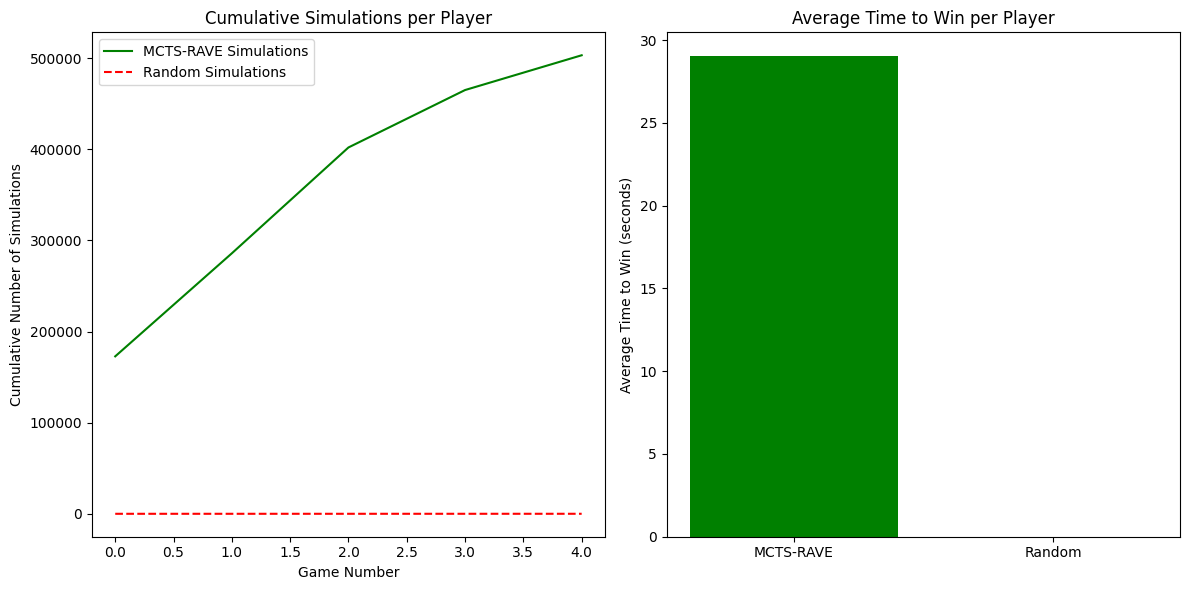

In [51]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from connect4_RAVE import GameBoard, RAVE, Node

def evaluate_rave_vs_random(num_games: int = 100):
    # Initialize counters for wins and draws
    rave_wins = 0
    random_wins = 0
    draws = 0

    # Lists to store simulation data and computation times
    rave_simulations = []  # Total simulations per game for RAVE
    random_simulations = []  # Total simulations per game for Random Player
    rave_times = []  # Total computation time per game for RAVE
    random_times = []  # Total computation time per game for Random Player

    # Loop through the specified number of games
    for game_num in range(num_games):
        print(f"Game {game_num+1}/{num_games}")
        # Initialize the game board and RAVE algorithm
        game_board = GameBoard(cpu=1)
        rave = RAVE(symbol=1, t=5.0)  # Use RAVE with a computation time of 5 seconds

        # Start the timer for the current match
        match_start_time = time.time()  
        rave_match_simulations = 0  # Reset simulation counter for RAVE
        random_match_simulations = 0  # Reset simulation counter for Random Player

        # Game loop
        while True:
            # Check if the game is over and determine the winner
            game_over, winner_id = game_board.check_win()
            if game_over:
                match_end_time = time.time()  
                match_time = match_end_time - match_start_time

                # Update win counters and store match time
                if winner_id == 1:
                    rave_wins += 1
                    rave_times.append(match_time)
                elif winner_id == 2:
                    random_wins += 1
                    random_times.append(match_time)
                else:
                    draws += 1

                # Store the total number of simulations for this match
                rave_simulations.append(rave_match_simulations)
                random_simulations.append(random_match_simulations)
                break

            # RAVE Player's turn
            if game_board.turn == 1: 
                # Create a root node for RAVE
                root = Node(parent=None, board=game_board.board.copy(), turn=1)
                move_start_time = time.time()
                # Compute the best move using RAVE
                move = rave.compute_move(root)
                move_time = time.time() - move_start_time

                # Handle the move returned by RAVE
                if move != (-1, -1):
                    # Convert coordinates (row, col) to a column number for apply_move
                    # Assuming move[1] is the column (0-6) and apply_move expects a column (1-7)
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # If RAVE fails to find a valid move, choose randomly
                    valid_moves = [col for col in range(7) if game_board.board[5, col] == 0]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Record the number of simulations for RAVE
                rave_match_simulations += root.n
            # Random Player's turn
            else: 
                # Choose a random valid move
                valid_moves = [col for col in range(7) if game_board.board[5, col] == 0]
                if valid_moves:
                    col = np.random.choice(valid_moves) + 1
                    game_board.apply_move(col)
                
                # Increment the simulation counter for the Random Player
                random_match_simulations += 1

    # Calculate win rates and draw rate
    rave_win_rate = (rave_wins / num_games) * 100
    random_win_rate = (random_wins / num_games) * 100
    draw_rate = (draws / num_games) * 100

    # Create a summary table
    table = [
        ["MCTS-RAVE Wins", rave_wins, f"{rave_win_rate:.1f}%"],
        ["Random Player Wins", random_wins, f"{random_win_rate:.1f}%"],
        ["Draws", draws, f"{draw_rate:.1f}%"]
    ]

    # Print the summary table
    print(tabulate(table, headers=["Metric", "Count", "Rate"], tablefmt="pretty"))

    # Plot the results
    plt.figure(figsize=(12, 6))

    # Cumulative simulations plot
    plt.subplot(1, 2, 1)
    plt.plot(np.cumsum(rave_simulations), label="MCTS-RAVE Simulations", color="green")
    plt.plot(np.cumsum(random_simulations), label="Random Simulations", color="red", linestyle="--")
    plt.xlabel("Game Number")
    plt.ylabel("Cumulative Number of Simulations")
    plt.title("Cumulative Simulations per Player")
    plt.legend()

    # Bar plot for average time to win
    plt.subplot(1, 2, 2)
    avg_rave_time = np.mean(rave_times) if rave_times else 0
    avg_random_time = np.mean(random_times) if random_times else 0
    plt.bar(["MCTS-RAVE", "Random"], [avg_rave_time, avg_random_time], color=["green", "red"])
    plt.ylabel("Average Time to Win (seconds)")
    plt.title("Average Time to Win per Player")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    evaluate_rave_vs_random(num_games=5)

## 2.MCTS-RAVE vs MCTS-GRAVE : 

Game 1/5
Game 2/5
Game 3/5
Game 4/5
Game 5/5

--- Match Results ---
+------------+-------+--------+
|   Metric   | Count |  Rate  |
+------------+-------+--------+
| RAVE Wins  |   5   | 100.0% |
| GRAVE Wins |   0   |  0.0%  |
|   Draws    |   0   |  0.0%  |
+------------+-------+--------+

--- Algorithm Performance ---
+-----------+---------------------+---------------------------+
| Algorithm | Average Simulations | Average Time per Move (s) |
+-----------+---------------------+---------------------------+
|   RAVE    |      128641.2       |           3.004           |
|   GRAVE   |       86506.2       |           3.005           |
+-----------+---------------------+---------------------------+


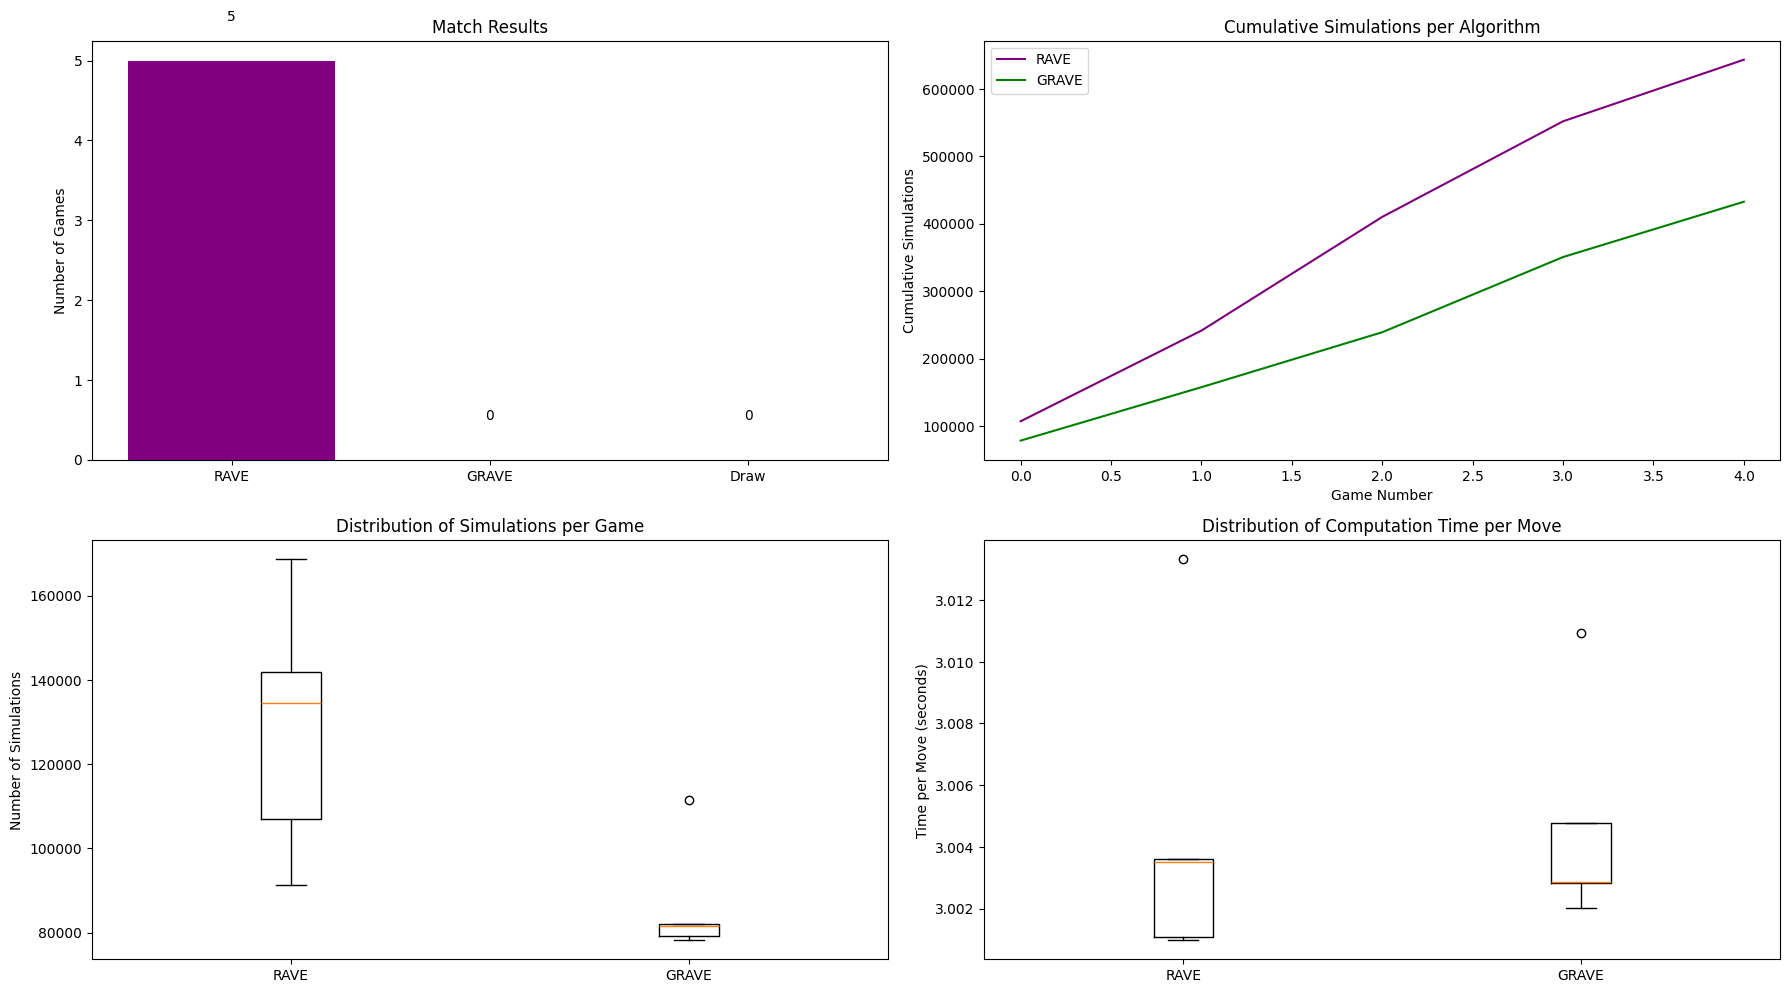

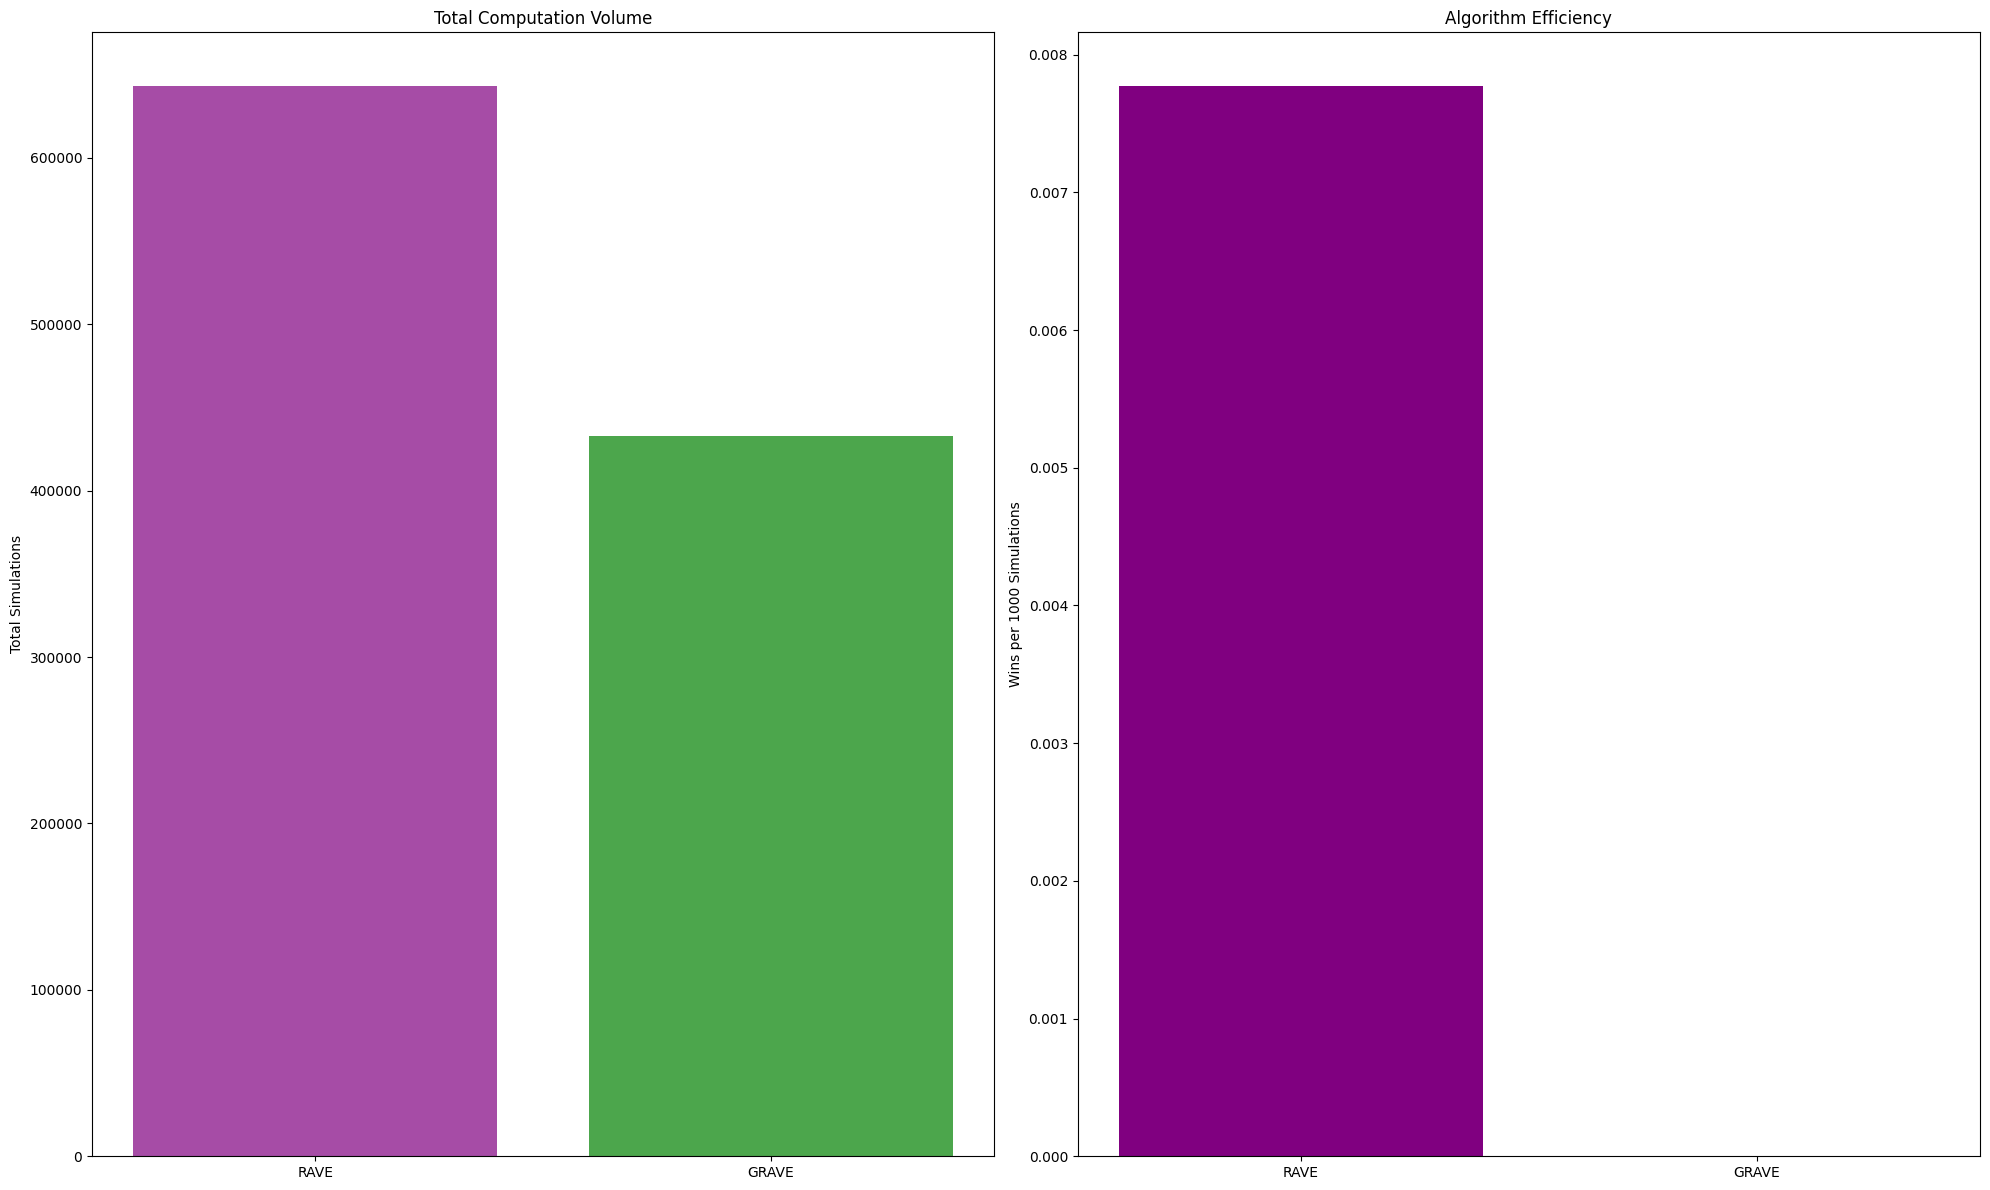

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tabulate import tabulate
from connect4_RAVE import Node as RAVENode, RAVE, GameBoard
from connect4_GRAVE import Node as GRAVENode, GRAVE

def evaluate_rave_vs_grave(num_games: int = 100, computation_time: float = 3.0):

    rave_wins = 0
    grave_wins = 0
    draws = 0

    # To store data
    rave_simulations = []  # Number of simulations per match for RAVE
    grave_simulations = []  # Number of simulations per match for GRAVE
    rave_times = []  # Computation time per match for RAVE
    grave_times = []  # Computation time per match for GRAVE
    
    # Data for average time per move
    rave_move_times = []
    grave_move_times = []

    # Alternate who starts first
    for game_num in range(num_games):
        print(f"Game {game_num+1}/{num_games}")
        
        # Alternate the first player
        if game_num % 2 == 0:
            rave_player, grave_player = 1, 2
        else:
            rave_player, grave_player = 2, 1
        
        game_board = GameBoard(cpu=1)  # Initialize the board
        
        # Initialize the algorithms
        rave = RAVE(symbol=rave_player, t=computation_time)
        grave = GRAVE(symbol=grave_player, t=computation_time)

        # Statistics for this match
        match_start_time = time.time()
        rave_match_simulations = 0
        grave_match_simulations = 0
        
        # Store move times
        rave_match_move_times = []
        grave_match_move_times = []

        # Game loop
        while True:
            # Check if the game is over
            game_over, winner_id = game_board.check_win()
            if game_over:
                match_end_time = time.time()
                match_time = match_end_time - match_start_time

                # Record results
                if winner_id == rave_player:
                    rave_wins += 1
                    rave_times.append(match_time)
                elif winner_id == grave_player:
                    grave_wins += 1
                    grave_times.append(match_time)
                else:
                    draws += 1

                # Record statistics for this match
                rave_simulations.append(rave_match_simulations)
                grave_simulations.append(grave_match_simulations)
                
                # Add average move times
                if rave_match_move_times:
                    rave_move_times.append(np.mean(rave_match_move_times))
                if grave_match_move_times:
                    grave_move_times.append(np.mean(grave_match_move_times))
                
                break

            # RAVE player's turn
            if game_board.turn == rave_player:
                root = RAVENode(parent=None, board=game_board.board.copy(), turn=rave_player)
                move_start_time = time.time()
                move = rave.compute_move(root)
                move_time = time.time() - move_start_time
                rave_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Convert (row, col) coordinates to column number
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # If RAVE doesn't find a valid move, choose randomly
                    valid_moves = [col for col in range(7) if np.any(game_board.board[:, col] == 0)]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Record the number of simulations
                rave_match_simulations += root.n
            
            # GRAVE player's turn
            elif game_board.turn == grave_player:
                root = GRAVENode(parent=None, board=game_board.board.copy(), turn=grave_player)
                move_start_time = time.time()
                move = grave.compute_move(root)
                move_time = time.time() - move_start_time
                grave_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Convert (row, col) coordinates to column number
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # If GRAVE doesn't find a valid move, choose randomly
                    valid_moves = [col for col in range(7) if np.any(game_board.board[:, col] == 0)]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Record the number of simulations
                grave_match_simulations += root.n

    # Calculate statistics
    rave_win_rate = (rave_wins / num_games) * 100
    grave_win_rate = (grave_wins / num_games) * 100
    draw_rate = (draws / num_games) * 100

    # Calculate averages
    avg_rave_simulations = np.mean(rave_simulations) if rave_simulations else 0
    avg_grave_simulations = np.mean(grave_simulations) if grave_simulations else 0
    avg_rave_move_time = np.mean(rave_move_times) if rave_move_times else 0
    avg_grave_move_time = np.mean(grave_move_times) if grave_move_times else 0

    # Create summary table
    table = [
        ["RAVE Wins", rave_wins, f"{rave_win_rate:.1f}%"],
        ["GRAVE Wins", grave_wins, f"{grave_win_rate:.1f}%"],
        ["Draws", draws, f"{draw_rate:.1f}%"]
    ]

    # Performance table
    performance_table = [
        ["Algorithm", "Average Simulations", "Average Time per Move (s)"],
        ["RAVE", f"{avg_rave_simulations:.1f}", f"{avg_rave_move_time:.3f}"],
        ["GRAVE", f"{avg_grave_simulations:.1f}", f"{avg_grave_move_time:.3f}"]
    ]

    # Display tables
    print("\n--- Match Results ---")
    print(tabulate(table, headers=["Metric", "Count", "Rate"], tablefmt="pretty"))
    
    print("\n--- Algorithm Performance ---")
    print(tabulate(performance_table, headers="firstrow", tablefmt="pretty"))

    # Graphs
    plt.figure(figsize=(18, 10))

    # Wins graph
    plt.subplot(2, 2, 1)
    plt.bar(["RAVE", "GRAVE", "Draw"], [rave_wins, grave_wins, draws], 
            color=["purple", "green", "gray"])
    plt.ylabel("Number of Games")
    plt.title("Match Results")
    for i, v in enumerate([rave_wins, grave_wins, draws]):
        plt.text(i, v + 0.5, str(v), ha='center')

    # Cumulative simulations graph
    plt.subplot(2, 2, 2)
    plt.plot(np.cumsum(rave_simulations), label="RAVE", color="purple")
    plt.plot(np.cumsum(grave_simulations), label="GRAVE", color="green")
    plt.xlabel("Game Number")
    plt.ylabel("Cumulative Simulations")
    plt.title("Cumulative Simulations per Algorithm")
    plt.legend()
    
    # Average simulations per game graph
    plt.subplot(2, 2, 3)
    plt.boxplot([rave_simulations, grave_simulations], tick_labels=["RAVE", "GRAVE"])
    plt.ylabel("Number of Simulations")
    plt.title("Distribution of Simulations per Game")
    
    # Average move time graph
    plt.subplot(2, 2, 4)
    plt.boxplot([rave_move_times, grave_move_times], tick_labels=["RAVE", "GRAVE"])
    plt.ylabel("Time per Move (seconds)")
    plt.title("Distribution of Computation Time per Move")

    plt.tight_layout()
    plt.show()

    # Additional graph: Efficiency (wins based on simulations)
    plt.figure(figsize=(20, 12))     
    # Graph 1: Wins based on total number of simulations
    plt.subplot(1, 2, 1)
    total_rave_sims = sum(rave_simulations)
    total_grave_sims = sum(grave_simulations)
    plt.bar(["RAVE", "GRAVE"], [total_rave_sims, total_grave_sims], alpha=0.7, color=["purple", "green"])
    plt.ylabel("Total Simulations")
    plt.title("Total Computation Volume")

    # Calculate efficiency (wins per 1000 simulations)
    rave_efficiency = (rave_wins / max(1, sum(rave_simulations))) * 1000
    grave_efficiency = (grave_wins / max(1, sum(grave_simulations))) * 1000

    # Graph 2: Efficiency (wins per 1000 simulations)
    plt.subplot(1, 2, 2)
    plt.bar(["RAVE", "GRAVE"], [rave_efficiency, grave_efficiency], color=["purple", "green"])
    plt.ylabel("Wins per 1000 Simulations")
    plt.title("Algorithm Efficiency")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    evaluate_rave_vs_grave(num_games=5, computation_time=3.0)

## 2.MCTS-RAVE vs MCTS-AMAF : 

Game 1/5
Game 2/5
Game 3/5
Game 4/5
Game 5/5

--- Match Results ---
+-----------+-------+-------+
|  Metric   | Count | Rate  |
+-----------+-------+-------+
| RAVE Wins |   4   | 80.0% |
| AMAF Wins |   1   | 20.0% |
|   Draws   |   0   | 0.0%  |
+-----------+-------+-------+

--- Algorithm Performance ---
+-----------+---------------------+---------------------------+
| Algorithm | Average Simulations | Average Time per Move (s) |
+-----------+---------------------+---------------------------+
|   RAVE    |      197523.0       |           3.003           |
|   AMAF    |      177686.8       |           3.004           |
+-----------+---------------------+---------------------------+


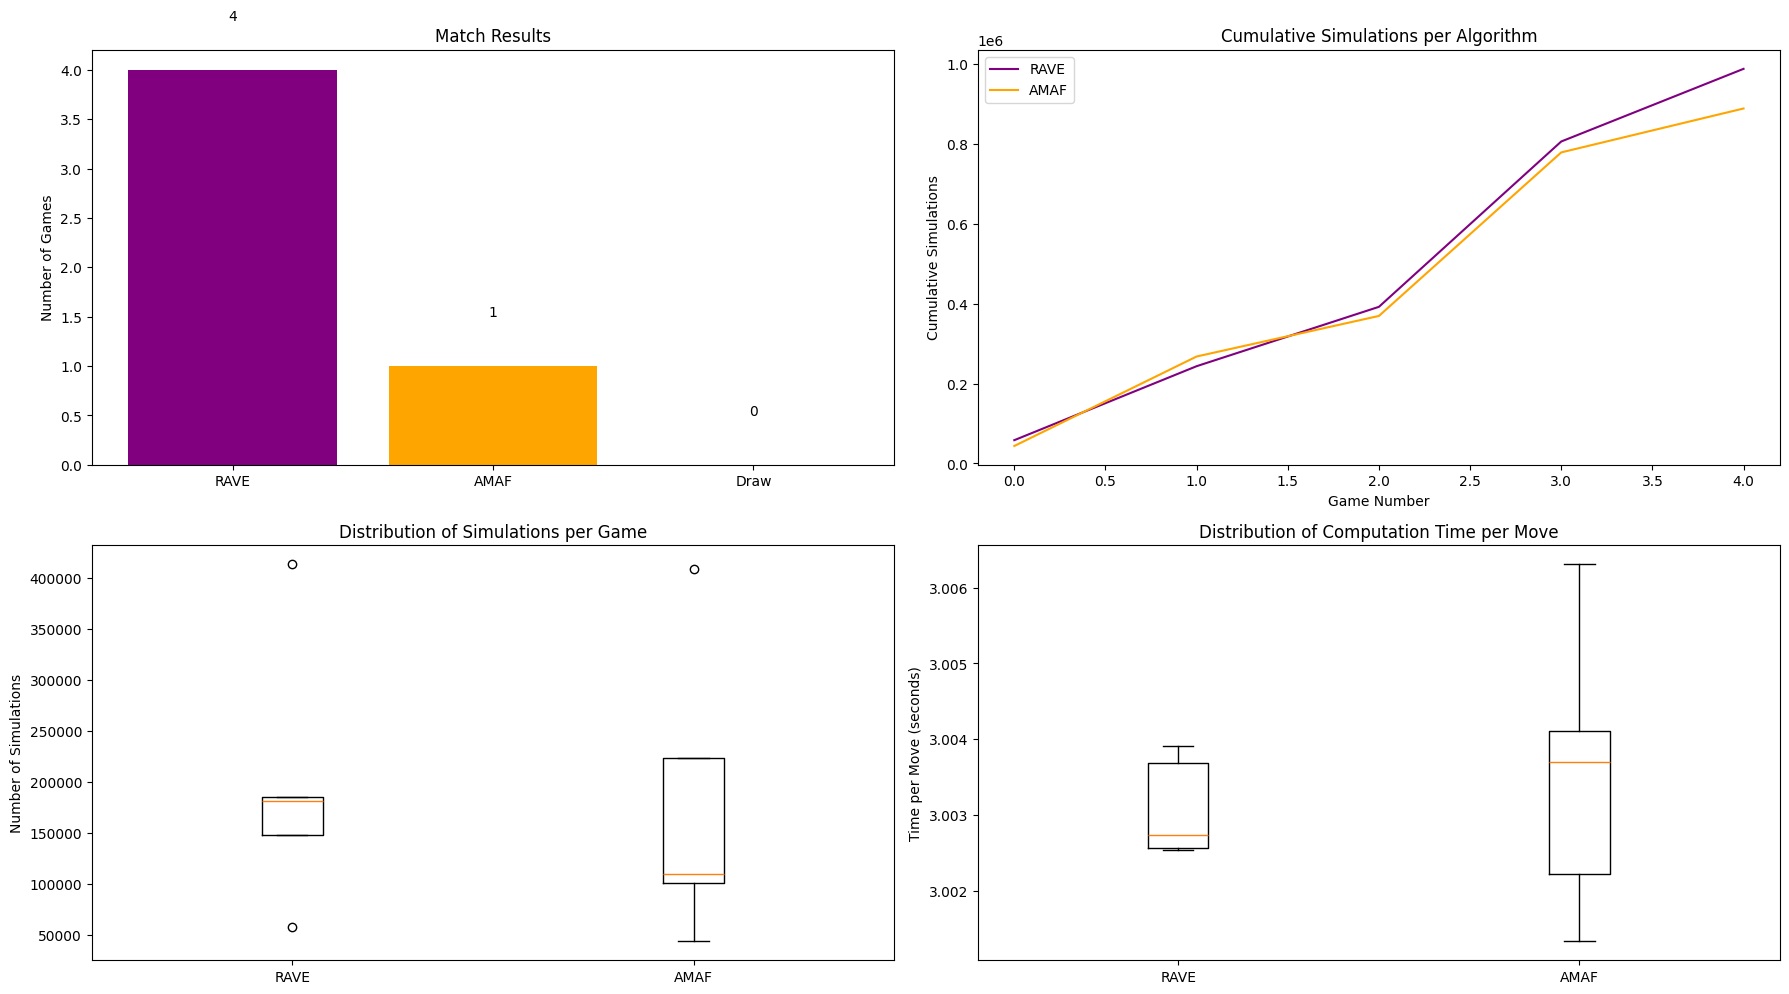

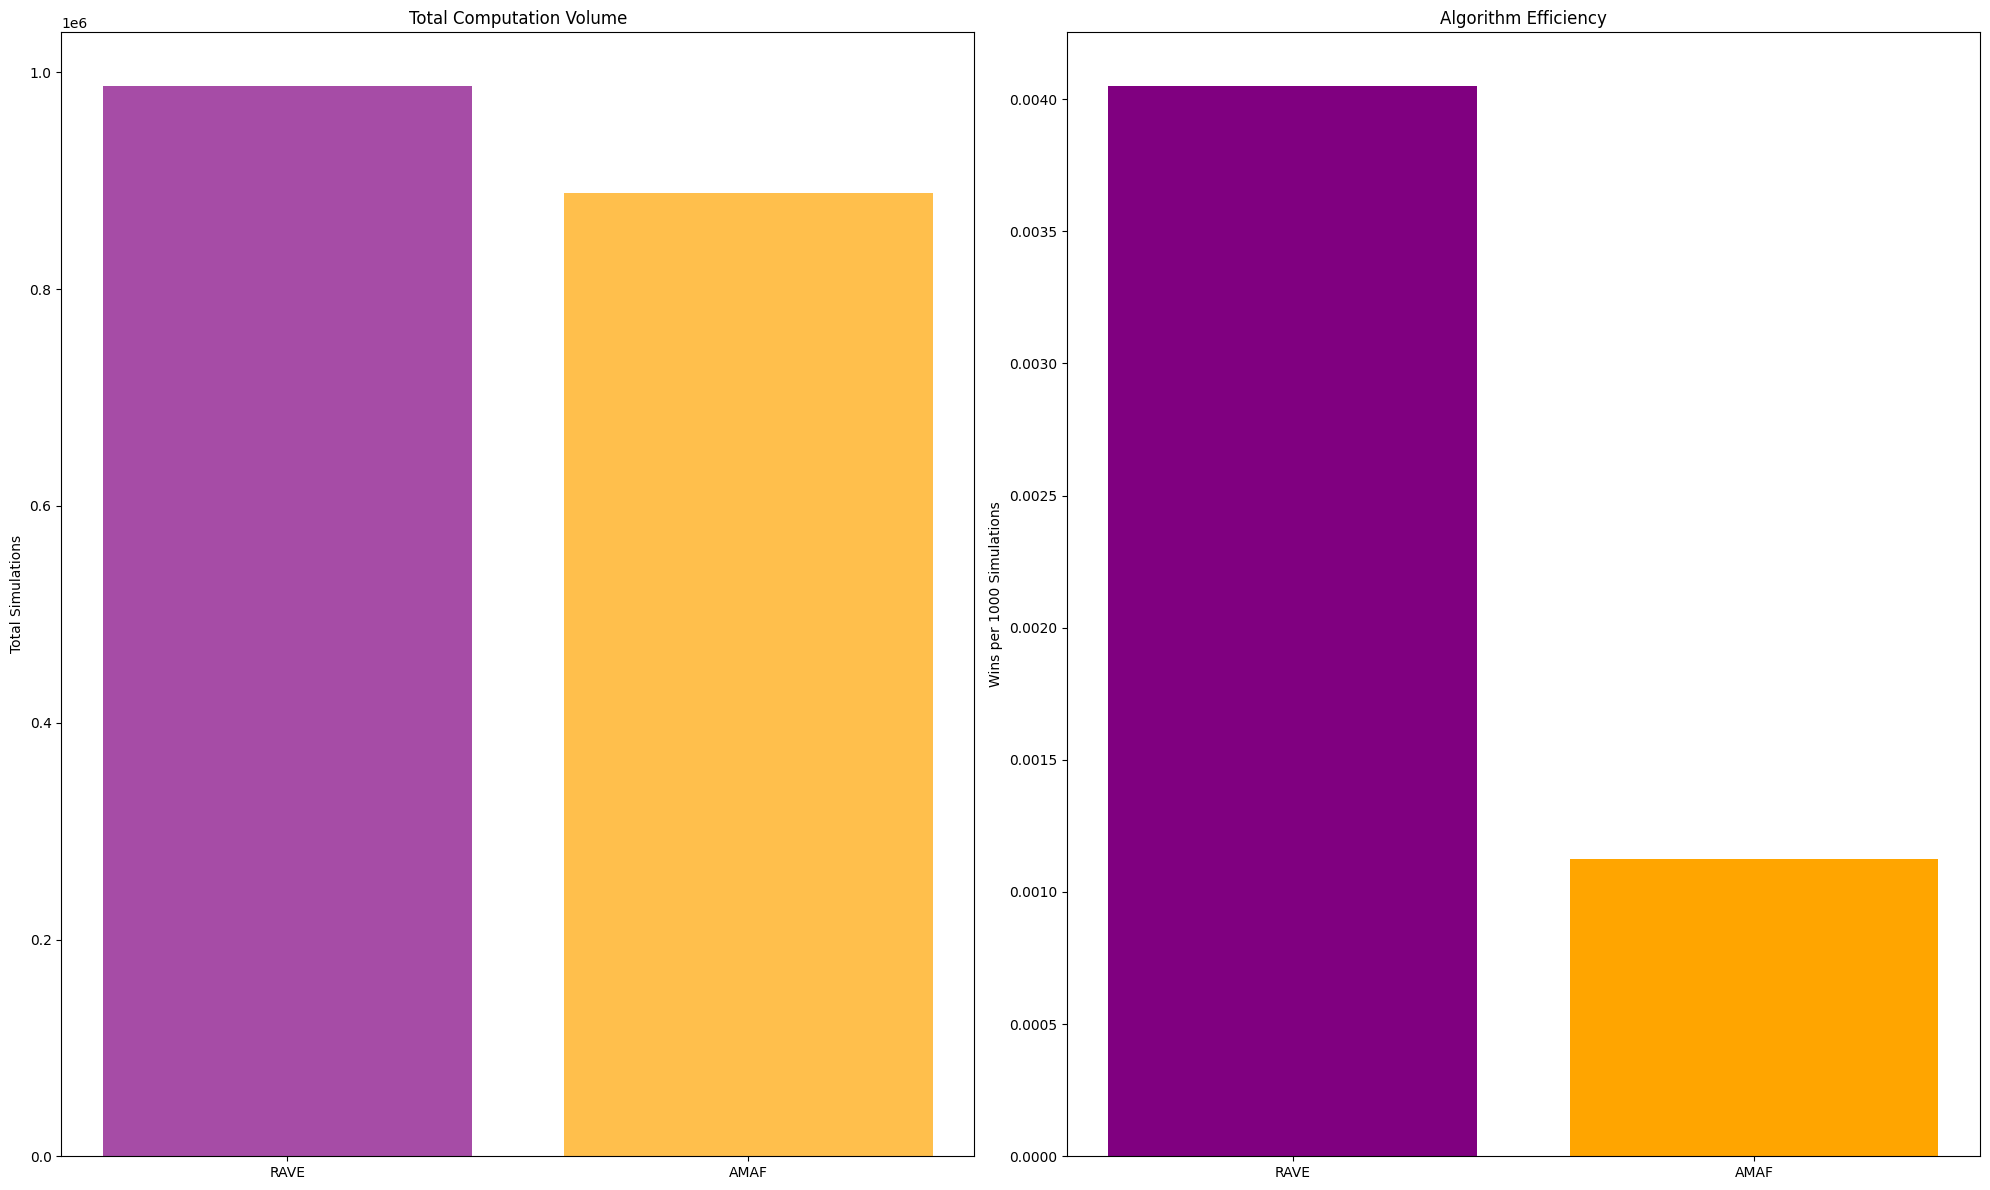

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tabulate import tabulate
from connect4_RAVE import Node as RAVENode, RAVE, GameBoard
from connect4_AMAF import Node as AMAFNode, AMAF

def evaluate_rave_vs_amaf(num_games: int = 100, computation_time: float = 3.0):
    rave_wins = 0
    amaf_wins = 0
    draws = 0

    # To store data
    rave_simulations = []  # Number of simulations per match for RAVE
    amaf_simulations = []  # Number of simulations per match for AMAF
    rave_times = []  # Computation time per match for RAVE
    amaf_times = []  # Computation time per match for AMAF
    
    # Data for average time per move
    rave_move_times = []
    amaf_move_times = []

    # Alternate who starts first
    for game_num in range(num_games):
        print(f"Game {game_num+1}/{num_games}")
        
        # Alternate the first player
        if game_num % 2 == 0:
            rave_player, amaf_player = 1, 2
        else:
            rave_player, amaf_player = 2, 1
        
        game_board = GameBoard(cpu=1)  # Initialize the board
        
        # Initialize the algorithms
        rave = RAVE(symbol=rave_player, t=computation_time)
        amaf = AMAF(symbol=amaf_player, t=computation_time)

        # Statistics for this match
        match_start_time = time.time()
        rave_match_simulations = 0
        amaf_match_simulations = 0
        
        # Store move times
        rave_match_move_times = []
        amaf_match_move_times = []

        # Game loop
        while True:
            # Check if the game is over
            game_over, winner_id = game_board.check_win()
            if game_over:
                match_end_time = time.time()
                match_time = match_end_time - match_start_time

                # Record results
                if winner_id == rave_player:
                    rave_wins += 1
                    rave_times.append(match_time)
                elif winner_id == amaf_player:
                    amaf_wins += 1
                    amaf_times.append(match_time)
                else:
                    draws += 1

                # Record statistics for this match
                rave_simulations.append(rave_match_simulations)
                amaf_simulations.append(amaf_match_simulations)
                
                # Add average move times
                if rave_match_move_times:
                    rave_move_times.append(np.mean(rave_match_move_times))
                if amaf_match_move_times:
                    amaf_move_times.append(np.mean(amaf_match_move_times))
                
                break

            # RAVE player's turn
            if game_board.turn == rave_player:
                root = RAVENode(parent=None, board=game_board.board.copy(), turn=rave_player)
                move_start_time = time.time()
                move = rave.compute_move(root)
                move_time = time.time() - move_start_time
                rave_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Convert (row, col) coordinates to column number
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # If RAVE doesn't find a valid move, choose randomly
                    valid_moves = [col for col in range(7) if np.any(game_board.board[:, col] == 0)]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Record the number of simulations
                rave_match_simulations += root.n
            
            # AMAF player's turn
            elif game_board.turn == amaf_player:
                root = AMAFNode(parent=None, board=game_board.board.copy(), turn=amaf_player)
                move_start_time = time.time()
                move = amaf.compute_move(root)
                move_time = time.time() - move_start_time
                amaf_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Convert (row, col) coordinates to column number
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # If AMAF doesn't find a valid move, choose randomly
                    valid_moves = [col for col in range(7) if np.any(game_board.board[:, col] == 0)]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Record the number of simulations
                amaf_match_simulations += root.n

    # Calculate statistics
    rave_win_rate = (rave_wins / num_games) * 100
    amaf_win_rate = (amaf_wins / num_games) * 100
    draw_rate = (draws / num_games) * 100

    # Calculate averages
    avg_rave_simulations = np.mean(rave_simulations) if rave_simulations else 0
    avg_amaf_simulations = np.mean(amaf_simulations) if amaf_simulations else 0
    avg_rave_move_time = np.mean(rave_move_times) if rave_move_times else 0
    avg_amaf_move_time = np.mean(amaf_move_times) if amaf_move_times else 0

    # Create summary table
    table = [
        ["RAVE Wins", rave_wins, f"{rave_win_rate:.1f}%"],
        ["AMAF Wins", amaf_wins, f"{amaf_win_rate:.1f}%"],
        ["Draws", draws, f"{draw_rate:.1f}%"]
    ]

    # Performance table
    performance_table = [
        ["Algorithm", "Average Simulations", "Average Time per Move (s)"],
        ["RAVE", f"{avg_rave_simulations:.1f}", f"{avg_rave_move_time:.3f}"],
        ["AMAF", f"{avg_amaf_simulations:.1f}", f"{avg_amaf_move_time:.3f}"]
    ]

    # Display tables
    print("\n--- Match Results ---")
    print(tabulate(table, headers=["Metric", "Count", "Rate"], tablefmt="pretty"))
    
    print("\n--- Algorithm Performance ---")
    print(tabulate(performance_table, headers="firstrow", tablefmt="pretty"))

    # Graphs
    plt.figure(figsize=(18, 10))

    # Wins graph
    plt.subplot(2, 2, 1)
    plt.bar(["RAVE", "AMAF", "Draw"], [rave_wins, amaf_wins, draws], 
            color=["purple", "orange", "gray"])
    plt.ylabel("Number of Games")
    plt.title("Match Results")
    for i, v in enumerate([rave_wins, amaf_wins, draws]):
        plt.text(i, v + 0.5, str(v), ha='center')

    # Cumulative simulations graph
    plt.subplot(2, 2, 2)
    plt.plot(np.cumsum(rave_simulations), label="RAVE", color="purple")
    plt.plot(np.cumsum(amaf_simulations), label="AMAF", color="orange")
    plt.xlabel("Game Number")
    plt.ylabel("Cumulative Simulations")
    plt.title("Cumulative Simulations per Algorithm")
    plt.legend()
    
    # Average simulations per game graph
    plt.subplot(2, 2, 3)
    plt.boxplot([rave_simulations, amaf_simulations], tick_labels=["RAVE", "AMAF"])
    plt.ylabel("Number of Simulations")
    plt.title("Distribution of Simulations per Game")
    
    # Average move time graph
    plt.subplot(2, 2, 4)
    plt.boxplot([rave_move_times, amaf_move_times], tick_labels=["RAVE", "AMAF"])
    plt.ylabel("Time per Move (seconds)")
    plt.title("Distribution of Computation Time per Move")

    plt.tight_layout()
    plt.show()

    # Additional graph: Efficiency (wins based on simulations)
    plt.figure(figsize=(20, 12))     
    # Graph 1: Wins based on total number of simulations
    plt.subplot(1, 2, 1)
    total_rave_sims = sum(rave_simulations)
    total_amaf_sims = sum(amaf_simulations)
    plt.bar(["RAVE", "AMAF"], [total_rave_sims, total_amaf_sims], alpha=0.7, color=["purple", "orange"])
    plt.ylabel("Total Simulations")
    plt.title("Total Computation Volume")

    # Calculate efficiency (wins per 1000 simulations)
    rave_efficiency = (rave_wins / max(1, sum(rave_simulations))) * 1000
    amaf_efficiency = (amaf_wins / max(1, sum(amaf_simulations))) * 1000

    # Graph 2: Efficiency (wins per 1000 simulations)
    plt.subplot(1, 2, 2)
    plt.bar(["RAVE", "AMAF"], [rave_efficiency, amaf_efficiency], color=["purple", "orange"])
    plt.ylabel("Wins per 1000 Simulations")
    plt.title("Algorithm Efficiency")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    evaluate_rave_vs_amaf(num_games=5, computation_time=3.0)

# III.MCTS-GRAVE : 

## 1.MCTS-GRAVE vs Random Player : 

### Evaluation of MCTS-GRAVE vs Random Player in Connect4

This script evaluates the performance of the MCTS-GRAVE
algorithm against a Random Player in the game of Connect4. The goal is to analyze the effectiveness of 
MCTS-UCB compared to a baseline random strategy.

#### Metrics Used:
1. **Win Rates**:
   - The percentage of games won by MCTS-GRAVE, the Random Player, and the number of draws.

2. **Simulations**:
   - The number of simulations performed by MCTS-GRAVE during the game.
   - Simulations represent the number of random playouts (rollouts) used to evaluate moves.
   - The Random Player is assumed to perform 1 simulation per move (random selection).

3. **Computation Time**:
   - The average time taken by MCTS-GRAVE to compute a move.
   - This metric helps evaluate the efficiency of the algorithm.

4. **Cumulative Simulations**:
   - The total number of simulations performed by MCTS-GRAVE across all games.
   - This shows the overall computational effort of the algorithm.

5. **Move Time Distribution**:
   - The distribution of time taken per move for MCTS-GRAVE.
   - This helps identify consistency in computation time.

#### Purpose of the Code:
- Compare the performance of MCTS-GRAVE against a Random Player in a controlled environment.
- Analyze the trade-offs between computation time, simulations, and win rates.
- Provide insights into the effectiveness of MCTS-GRAVE for Connect4.

The results are displayed in tables and graphs for easy interpretation.


Game 1/5
Game 2/5
Game 3/5
Game 4/5
Game 5/5
+--------------------+-------+-------+
|       Metric       | Count | Rate  |
+--------------------+-------+-------+
|     GRAVE Wins     |   2   | 40.0% |
| Random Player Wins |   3   | 60.0% |
|       Draws        |   0   | 0.0%  |
+--------------------+-------+-------+


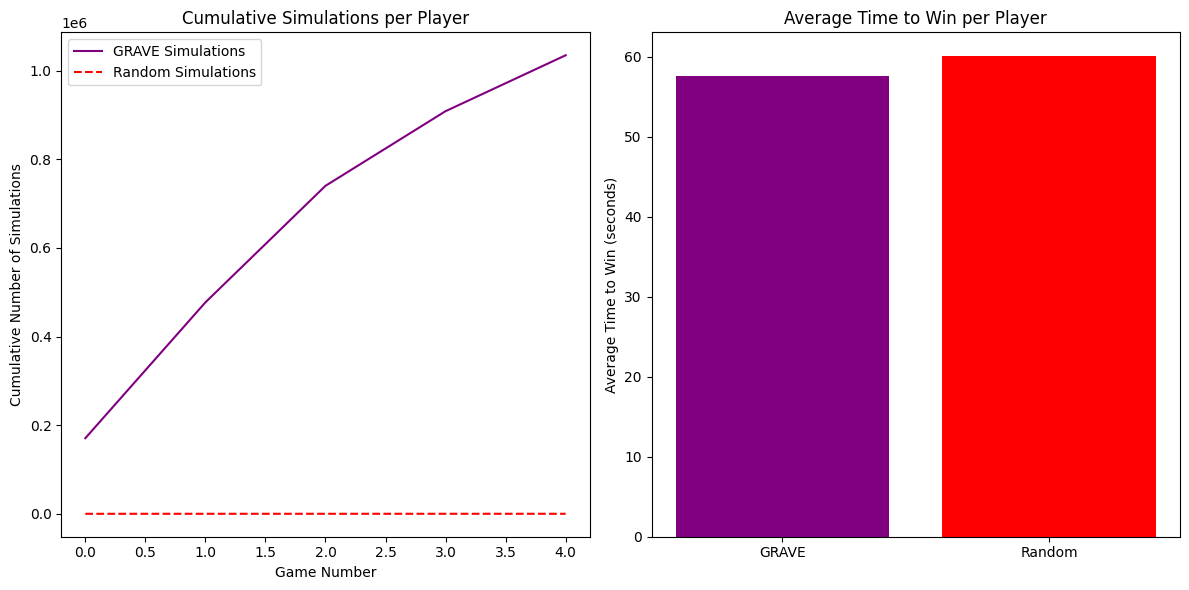

In [55]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from connect4_GRAVE import GameBoard, GRAVE, Node  

def evaluate_grave_vs_random(num_games: int = 100):
    # Initialize counters for wins and draws
    grave_wins = 0
    random_wins = 0
    draws = 0

    # Lists to store simulation data and computation times
    grave_simulations = []  # Total simulations per game for GRAVE
    random_simulations = []  # Total simulations per game for Random Player
    grave_times = []  # Total computation time per game for GRAVE
    random_times = []  # Total computation time per game for Random Player

    # Loop through the specified number of games
    for game_num in range(num_games):
        print(f"Game {game_num+1}/{num_games}")
        # Initialize the game board and GRAVE algorithm
        game_board = GameBoard(cpu=1)
        grave = GRAVE(symbol=1, t=5.0)  # Use GRAVE with a computation time of 5 seconds

        # Start the timer for the current match
        match_start_time = time.time()  
        grave_match_simulations = 0  # Reset simulation counter for GRAVE
        random_match_simulations = 0  # Reset simulation counter for Random Player

        # Game loop
        while True:
            # Check if the game is over and determine the winner
            game_over, winner_id = game_board.check_win()
            if game_over:
                match_end_time = time.time()  
                match_time = match_end_time - match_start_time

                # Update win counters and store match time
                if winner_id == 1:
                    grave_wins += 1
                    grave_times.append(match_time)
                elif winner_id == 2:
                    random_wins += 1
                    random_times.append(match_time)
                else:
                    draws += 1

                # Store the total number of simulations for this match
                grave_simulations.append(grave_match_simulations)
                random_simulations.append(random_match_simulations)
                break

            # GRAVE Player's turn
            if game_board.turn == 1: 
                # Create a root node for GRAVE
                root = Node(parent=None, board=game_board.board.copy(), turn=1)
                move_start_time = time.time()
                # Compute the best move using GRAVE
                move = grave.compute_move(root)
                move_time = time.time() - move_start_time

                # Handle the move returned by GRAVE
                if move != (-1, -1):
                    # Convert coordinates (row, col) to a column number for apply_move
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # If GRAVE fails to find a valid move, choose randomly
                    valid_moves = [col for col in range(7) if game_board.board[5, col] == 0]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Record the number of simulations for GRAVE
                grave_match_simulations += root.n
            # Random Player's turn
            else: 
                # Choose a random valid move
                valid_moves = [col for col in range(7) if game_board.board[5, col] == 0]
                if valid_moves:
                    col = np.random.choice(valid_moves) + 1
                    game_board.apply_move(col)
                
                # Increment the simulation counter for the Random Player
                random_match_simulations += 1

    # Calculate win rates and draw rate
    grave_win_rate = (grave_wins / num_games) * 100
    random_win_rate = (random_wins / num_games) * 100
    draw_rate = (draws / num_games) * 100

    # Create a summary table
    table = [
        ["GRAVE Wins", grave_wins, f"{grave_win_rate:.1f}%"],
        ["Random Player Wins", random_wins, f"{random_win_rate:.1f}%"],
        ["Draws", draws, f"{draw_rate:.1f}%"]
    ]

    # Print the summary table
    print(tabulate(table, headers=["Metric", "Count", "Rate"], tablefmt="pretty"))

    # Plot the results
    plt.figure(figsize=(12, 6))

    # Cumulative simulations plot
    plt.subplot(1, 2, 1)
    plt.plot(np.cumsum(grave_simulations), label="GRAVE Simulations", color="purple")
    plt.plot(np.cumsum(random_simulations), label="Random Simulations", color="red", linestyle="--")
    plt.xlabel("Game Number")
    plt.ylabel("Cumulative Number of Simulations")
    plt.title("Cumulative Simulations per Player")
    plt.legend()

    # Bar plot for average time to win
    plt.subplot(1, 2, 2)
    avg_grave_time = np.mean(grave_times) if grave_times else 0
    avg_random_time = np.mean(random_times) if random_times else 0
    plt.bar(["GRAVE", "Random"], [avg_grave_time, avg_random_time], color=["purple", "red"])
    plt.ylabel("Average Time to Win (seconds)")
    plt.title("Average Time to Win per Player")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Run the evaluation with 10 games
    evaluate_grave_vs_random(num_games=5)

## 2.MCTS-GRAVE vs MCTS-AMAF : 

## GRAVE vs AMAF Evaluation in Connect 4

This script evaluates the performance of the **GRAVE** (Graph Retrieval and Value Estimation) algorithm against the **AMAF** (All Moves As First) algorithm in the game of Connect 4. The goal is to compare the two algorithms in terms of win rates, computational efficiency, and overall performance.


### Metrics Used:
1. **Win Rates**:
   - The percentage of games won by GRAVE, AMAF, and the number of draws.

2. **Simulations**:
   - The number of simulations performed by each algorithm during a game.
   - Simulations represent the number of random playouts (rollouts) used to evaluate moves.

3. **Computation Time**:
   - The average time taken by each algorithm to compute a move.
   - This metric helps evaluate the efficiency of the algorithms.

4. **Efficiency**:
   - Simulations per second: How many simulations each algorithm can perform per second.
   - Wins per 1000 simulations: How effective the algorithms are at converting simulations into wins.

5. **Cumulative Simulations**:
   - The total number of simulations performed by each algorithm across all games.
   - This shows the overall computational effort of each algorithm.

6. **Move Time Distribution**:
   - The distribution of time taken per move for both algorithms.
   - This helps identify consistency in computation time.


### Purpose of the Code:
- Compare the performance of GRAVE and AMAF in a controlled environment.
- Analyze the trade-offs between computation time, simulations, and win rates.
- Provide insights into which algorithm is more efficient and effective for Connect 4.

The results are displayed in tables and graphs for easy interpretation and saved for further analysis.



Game 1/5
Game 2/5
Game 3/5
Game 4/5
Game 5/5

--- Match Results ---
+------------+-------+-------+
|   Metric   | Count | Rate  |
+------------+-------+-------+
| GRAVE Wins |   2   | 40.0% |
| AMAF Wins  |   1   | 20.0% |
|   Draws    |   2   | 40.0% |
+------------+-------+-------+

--- Algorithm Performance ---
+-----------+---------------------+---------------------------+
| Algorithm | Average Simulations | Average Time per Move (s) |
+-----------+---------------------+---------------------------+
|   GRAVE   |      291385.6       |           3.003           |
|   AMAF    |      280593.0       |           3.001           |
+-----------+---------------------+---------------------------+


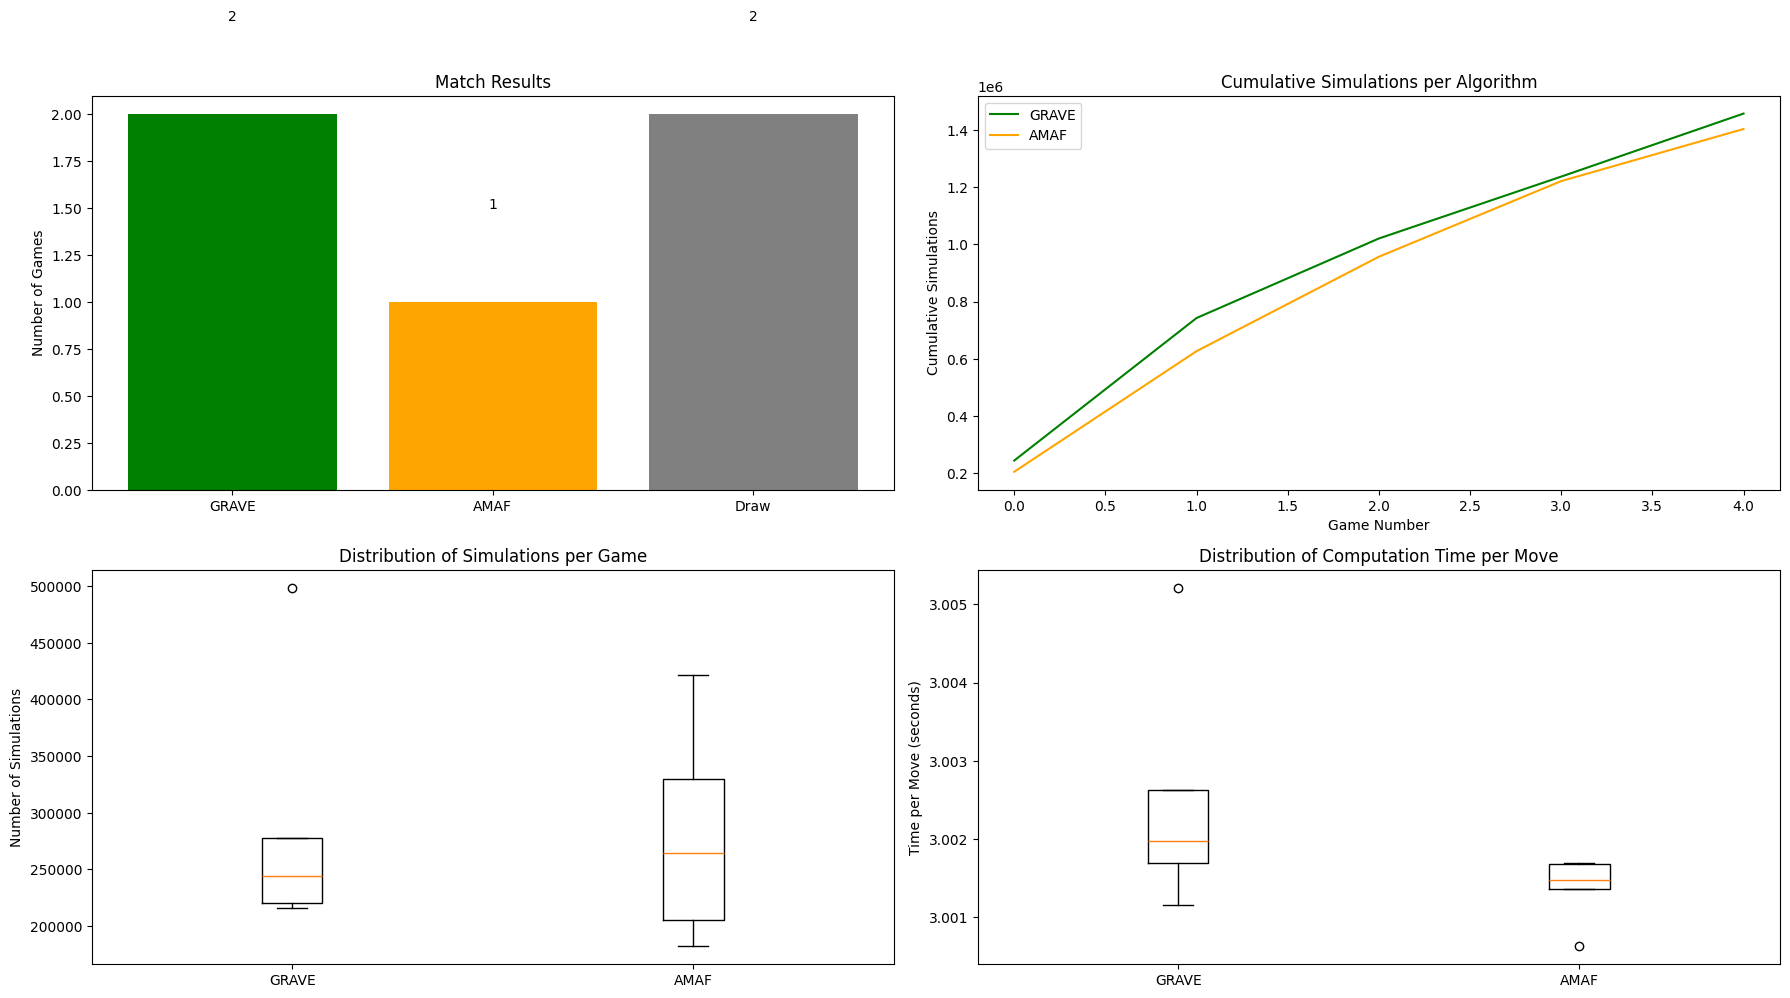

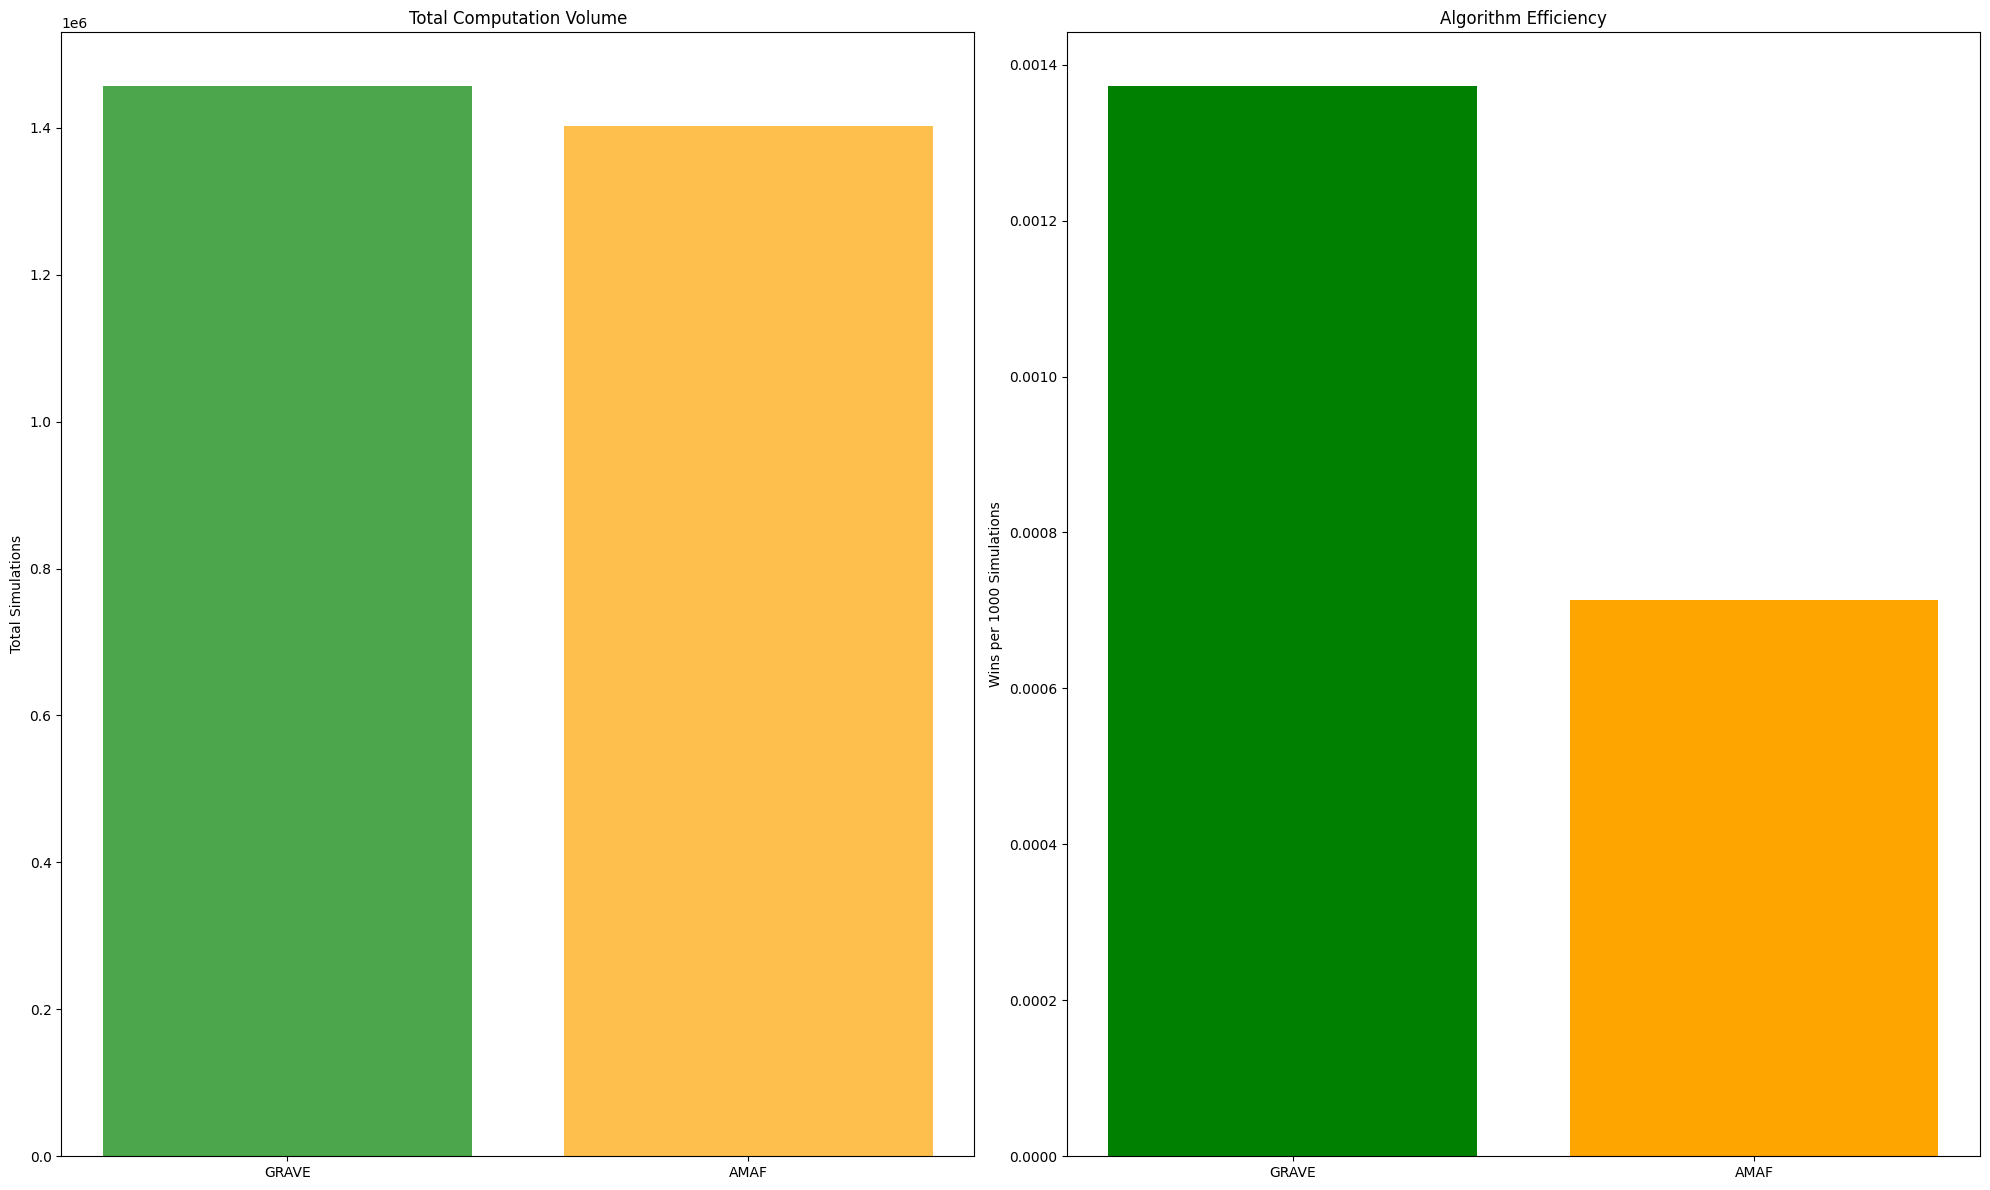

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tabulate import tabulate
from connect4_GRAVE import Node as GRAVENode, GRAVE, GameBoard
from connect4_AMAF import Node as AMAFNode, AMAF

def evaluate_grave_vs_amaf(num_games: int = 100, computation_time: float = 3.0):

    grave_wins = 0
    amaf_wins = 0
    draws = 0

    # Pour stocker les données
    grave_simulations = []  # Nombre de simulations par match pour GRAVE
    amaf_simulations = []  # Nombre de simulations par match pour AMAF
    grave_times = []  # Temps de calcul par match pour GRAVE
    amaf_times = []  # Temps de calcul par match pour AMAF
    
    # Données pour le temps moyen par coup
    grave_move_times = []
    amaf_move_times = []

    # Alterner qui commence en premier
    for game_num in range(num_games):
        print(f"Game {game_num+1}/{num_games}")
        
        # Alterner le premier joueur
        if game_num % 2 == 0:
            grave_player, amaf_player = 1, 2
        else:
            grave_player, amaf_player = 2, 1
        
        game_board = GameBoard(cpu=1)  # Initialiser le plateau
        
        # Initialiser les algorithmes
        grave = GRAVE(symbol=grave_player, t=computation_time)
        amaf = AMAF(symbol=amaf_player, t=computation_time)

        # Statistiques pour ce match
        match_start_time = time.time()
        grave_match_simulations = 0
        amaf_match_simulations = 0
        
        # Stocker les temps par coup
        grave_match_move_times = []
        amaf_match_move_times = []

        # Boucle de jeu
        while True:
            # Vérifier si le jeu est terminé
            game_over, winner_id = game_board.check_win()
            if game_over:
                match_end_time = time.time()
                match_time = match_end_time - match_start_time

                # Enregistrer les résultats
                if winner_id == grave_player:
                    grave_wins += 1
                    grave_times.append(match_time)
                elif winner_id == amaf_player:
                    amaf_wins += 1
                    amaf_times.append(match_time)
                else:
                    draws += 1

                # Enregistrer les statistiques pour ce match
                grave_simulations.append(grave_match_simulations)
                amaf_simulations.append(amaf_match_simulations)
                
                # Ajouter les temps moyens par coup
                if grave_match_move_times:
                    grave_move_times.append(np.mean(grave_match_move_times))
                if amaf_match_move_times:
                    amaf_move_times.append(np.mean(amaf_match_move_times))
                
                break

            # Tour du joueur GRAVE
            if game_board.turn == grave_player:
                root = GRAVENode(parent=None, board=game_board.board.copy(), turn=grave_player)
                move_start_time = time.time()
                move = grave.compute_move(root)
                move_time = time.time() - move_start_time
                grave_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Convertir les coordonnées (row, col) en numéro de colonne
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # Si GRAVE ne trouve pas de coup valide, choisir aléatoirement
                    valid_moves = [col for col in range(7) if np.any(game_board.board[:, col] == 0)]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Enregistrer le nombre de simulations
                grave_match_simulations += root.n
            
            # Tour du joueur AMAF
            elif game_board.turn == amaf_player:
                root = AMAFNode(parent=None, board=game_board.board.copy(), turn=amaf_player)
                move_start_time = time.time()
                move = amaf.compute_move(root)
                move_time = time.time() - move_start_time
                amaf_match_move_times.append(move_time)

                if move != (-1, -1):
                    # Convertir les coordonnées (row, col) en numéro de colonne
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # Si AMAF ne trouve pas de coup valide, choisir aléatoirement
                    valid_moves = [col for col in range(7) if np.any(game_board.board[:, col] == 0)]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Enregistrer le nombre de simulations
                amaf_match_simulations += root.n

    # Calcul des statistiques
    grave_win_rate = (grave_wins / num_games) * 100
    amaf_win_rate = (amaf_wins / num_games) * 100
    draw_rate = (draws / num_games) * 100

    # Calcul des moyennes
    avg_grave_simulations = np.mean(grave_simulations) if grave_simulations else 0
    avg_amaf_simulations = np.mean(amaf_simulations) if amaf_simulations else 0
    avg_grave_move_time = np.mean(grave_move_times) if grave_move_times else 0
    avg_amaf_move_time = np.mean(amaf_move_times) if amaf_move_times else 0

    # Création du tableau récapitulatif
    table = [
        ["GRAVE Wins", grave_wins, f"{grave_win_rate:.1f}%"],
        ["AMAF Wins", amaf_wins, f"{amaf_win_rate:.1f}%"],
        ["Draws", draws, f"{draw_rate:.1f}%"]
    ]

    # Tableau des performances
    performance_table = [
        ["Algorithm", "Average Simulations", "Average Time per Move (s)"],
        ["GRAVE", f"{avg_grave_simulations:.1f}", f"{avg_grave_move_time:.3f}"],
        ["AMAF", f"{avg_amaf_simulations:.1f}", f"{avg_amaf_move_time:.3f}"]
    ]

    # Affichage des tableaux
    print("\n--- Match Results ---")
    print(tabulate(table, headers=["Metric", "Count", "Rate"], tablefmt="pretty"))
    
    print("\n--- Algorithm Performance ---")
    print(tabulate(performance_table, headers="firstrow", tablefmt="pretty"))

    # Graphiques
    plt.figure(figsize=(18, 10))

    # Graphique des victoires
    plt.subplot(2, 2, 1)
    plt.bar(["GRAVE", "AMAF", "Draw"], [grave_wins, amaf_wins, draws], 
            color=["green", "orange", "gray"])
    plt.ylabel("Number of Games")
    plt.title("Match Results")
    for i, v in enumerate([grave_wins, amaf_wins, draws]):
        plt.text(i, v + 0.5, str(v), ha='center')

    # Graphique des simulations cumulées
    plt.subplot(2, 2, 2)
    plt.plot(np.cumsum(grave_simulations), label="GRAVE", color="green")
    plt.plot(np.cumsum(amaf_simulations), label="AMAF", color="orange")
    plt.xlabel("Game Number")
    plt.ylabel("Cumulative Simulations")
    plt.title("Cumulative Simulations per Algorithm")
    plt.legend()
    
    # Graphique des simulations moyennes par partie
    plt.subplot(2, 2, 3)
    plt.boxplot([grave_simulations, amaf_simulations], tick_labels=["GRAVE", "AMAF"])
    plt.ylabel("Number of Simulations")
    plt.title("Distribution of Simulations per Game")
    
    # Graphique des temps moyens par coup
    plt.subplot(2, 2, 4)
    plt.boxplot([grave_move_times, amaf_move_times], tick_labels=["GRAVE", "AMAF"])
    plt.ylabel("Time per Move (seconds)")
    plt.title("Distribution of Computation Time per Move")

    plt.tight_layout()
    plt.show()

    # Graphique supplémentaire: Efficacité (victoires / simulations)
    plt.figure(figsize=(20, 12))     
    # Graph 1: Volume total de calcul
    plt.subplot(1, 2, 1)
    total_grave_sims = sum(grave_simulations)
    total_amaf_sims = sum(amaf_simulations)
    plt.bar(["GRAVE", "AMAF"], [total_grave_sims, total_amaf_sims], alpha=0.7, color=["green", "orange"])
    plt.ylabel("Total Simulations")
    plt.title("Total Computation Volume")

    # Calculer l'efficacité (victoires par 1000 simulations)
    grave_efficiency = (grave_wins / max(1, sum(grave_simulations))) * 1000
    amaf_efficiency = (amaf_wins / max(1, sum(amaf_simulations))) * 1000

    # Graph 2: Efficacité (victoires par 1000 simulations)
    plt.subplot(1, 2, 2)
    plt.bar(["GRAVE", "AMAF"], [grave_efficiency, amaf_efficiency], color=["green", "orange"])
    plt.ylabel("Wins per 1000 Simulations")
    plt.title("Algorithm Efficiency")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    evaluate_grave_vs_amaf(num_games=5, computation_time=3.0)

# IV.MCTS-AMAF : 

## 1.MCTS-AMAF vs Random Player : 

### Evaluation of MCTS-AMAF vs Random Player in Connect4

This script evaluates the performance of the MCTS-AMAF
algorithm against a Random Player in the game of Connect4. The goal is to analyze the effectiveness of 
MCTS-UCB compared to a baseline random strategy.

#### Metrics Used:
1. **Win Rates**:
   - The percentage of games won by MCTS-AMAF, the Random Player, and the number of draws.

2. **Simulations**:
   - The number of simulations performed by MCTS-AMAF during the game.
   - Simulations represent the number of random playouts (rollouts) used to evaluate moves.
   - The Random Player is assumed to perform 1 simulation per move (random selection).

3. **Computation Time**:
   - The average time taken by MCTS-AMAF to compute a move.
   - This metric helps evaluate the efficiency of the algorithm.

4. **Cumulative Simulations**:
   - The total number of simulations performed by MCTS-AMAF across all games.
   - This shows the overall computational effort of the algorithm.

5. **Move Time Distribution**:
   - The distribution of time taken per move for MCTS-AMAF.
   - This helps identify consistency in computation time.

#### Purpose of the Code:
- Compare the performance of MCTS-AMAF against a Random Player in a controlled environment.
- Analyze the trade-offs between computation time, simulations, and win rates.
- Provide insights into the effectiveness of MCTS-AMAF for Connect4.

The results are displayed in tables and graphs for easy interpretation.


Game 1/5
Game 2/5
Game 3/5
Game 4/5
Game 5/5

--- Results ---
+--------------------+-------+-------+
|       Metric       | Count | Rate  |
+--------------------+-------+-------+
|     AMAF Wins      |   0   | 0.0%  |
| Random Player Wins |   4   | 80.0% |
|       Draws        |   1   | 20.0% |
+--------------------+-------+-------+

Average AMAF simulations per game: 212243.8
Total AMAF simulations: 1061219


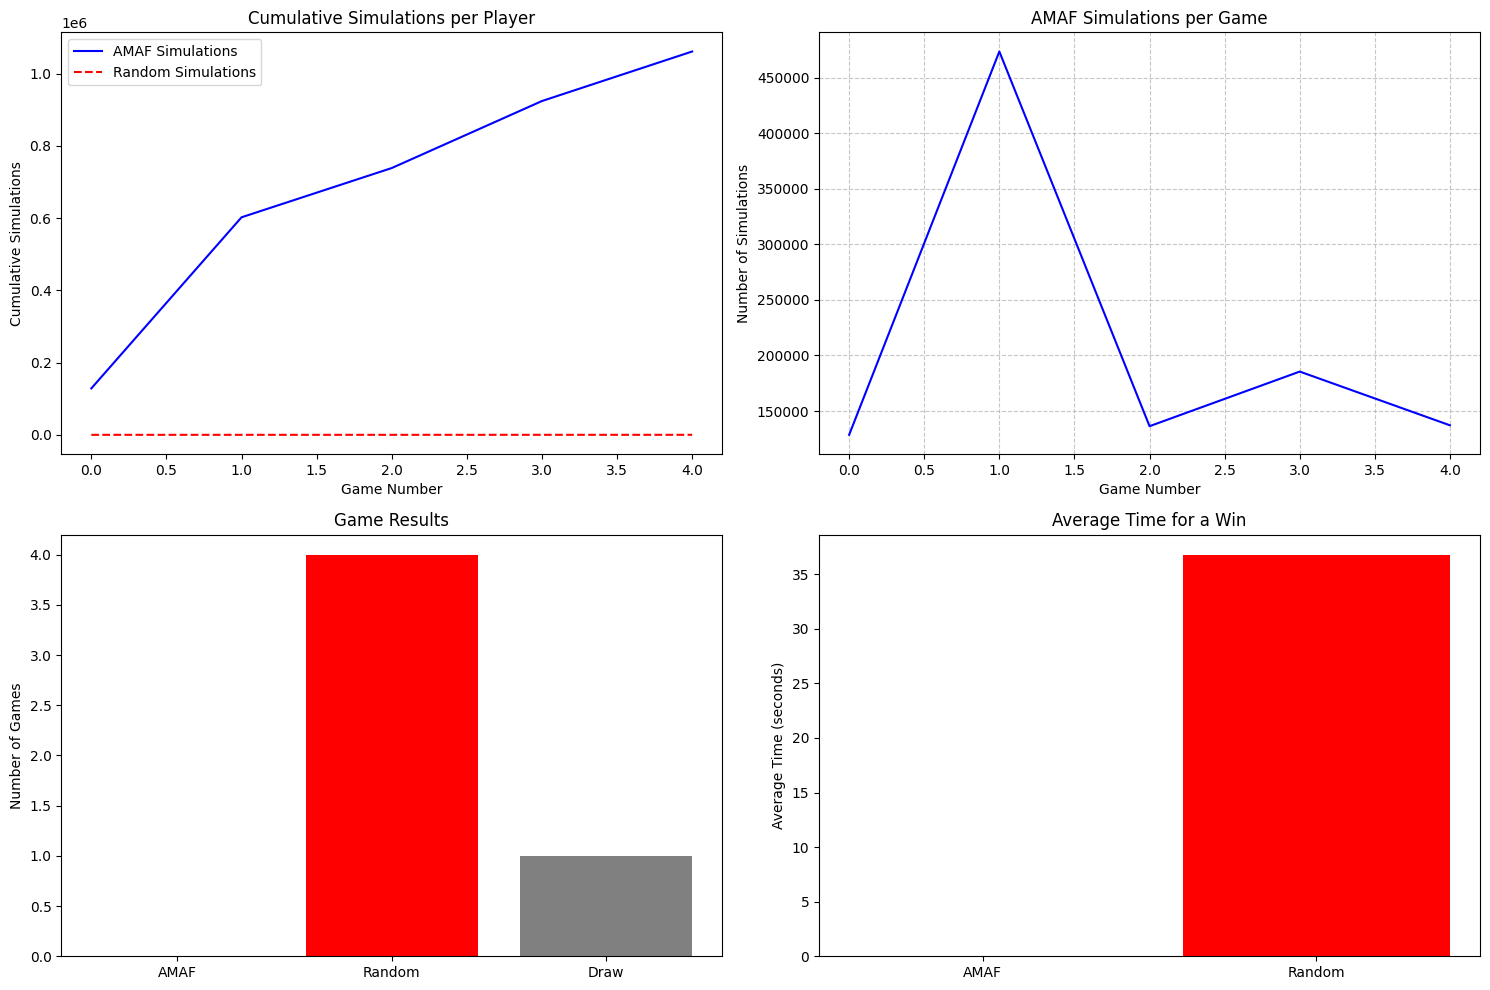

In [59]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from typing import Tuple, List, Optional, Dict
from connect4_AMAF import GameBoard, AMAF, Node

def evaluate_amaf_vs_random(num_games: int = 100, computation_time: float = 3.0):

    amaf_wins = 0
    random_wins = 0
    draws = 0

    # Lists to store simulation data and computation times
    amaf_simulations = []  # Total simulations per game for AMAF
    random_simulations = []  # Total simulations per game for Random Player
    amaf_times = []  # Total computation time per game for AMAF
    random_times = []  # Total computation time per game for Random Player

    # Loop through the specified number of games
    for game_num in range(num_games):
        print(f"Game {game_num+1}/{num_games}")
        # Initialize the game board and AMAF algorithm
        game_board = GameBoard(cpu=1)
        amaf = AMAF(symbol=1, t=computation_time)  # Use AMAF with the specified computation time

        # Start the timer for the current match
        match_start_time = time.time()  
        amaf_match_simulations = 0  # Reset simulation counter for AMAF
        random_match_simulations = 0  # Reset simulation counter for Random Player

        # Game loop
        while True:
            # Check if the game is over and determine the winner
            game_over, winner_id = game_board.check_win()
            if game_over:
                match_end_time = time.time()  
                match_time = match_end_time - match_start_time

                # Update win counters and store match time
                if winner_id == 1:
                    amaf_wins += 1
                    amaf_times.append(match_time)
                elif winner_id == 2:
                    random_wins += 1
                    random_times.append(match_time)
                else:
                    draws += 1

                # Store the total number of simulations for this match
                amaf_simulations.append(amaf_match_simulations)
                random_simulations.append(random_match_simulations)
                break

            # AMAF Player's turn
            if game_board.turn == 1: 
                # Create a root node for AMAF
                root = Node(parent=None, board=game_board.board.copy(), turn=1)
                move_start_time = time.time()
                # Compute the best move using AMAF
                move = amaf.compute_move(root)
                move_time = time.time() - move_start_time

                # Handle the move returned by AMAF
                if move != (-1, -1):
                    # Convert coordinates (row, col) to a column number for apply_move
                    col = move[1] + 1
                    game_board.apply_move(col)
                else:
                    # If AMAF fails to find a valid move, choose randomly
                    valid_moves = [col for col in range(7) if np.any(game_board.board[:, col] == 0)]
                    if valid_moves:
                        col = np.random.choice(valid_moves) + 1
                        game_board.apply_move(col)
                
                # Record the number of simulations for AMAF
                amaf_match_simulations += root.n
            # Random Player's turn
            else: 
                # Choose a random valid move
                valid_moves = [col for col in range(7) if np.any(game_board.board[:, col] == 0)]
                if valid_moves:
                    col = np.random.choice(valid_moves) + 1
                    game_board.apply_move(col)
                
                # Increment the simulation counter for the Random Player
                random_match_simulations += 1

    # Calculate win rates and draw rate
    amaf_win_rate = (amaf_wins / num_games) * 100
    random_win_rate = (random_wins / num_games) * 100
    draw_rate = (draws / num_games) * 100

    # Create a summary table
    table = [
        ["AMAF Wins", amaf_wins, f"{amaf_win_rate:.1f}%"],
        ["Random Player Wins", random_wins, f"{random_win_rate:.1f}%"],
        ["Draws", draws, f"{draw_rate:.1f}%"]
    ]

    # Print the summary table
    print("\n--- Results ---")
    print(tabulate(table, headers=["Metric", "Count", "Rate"], tablefmt="pretty"))


    # Additional statistics
    if amaf_simulations:
        avg_amaf_simulations = np.mean(amaf_simulations)
        total_amaf_simulations = np.sum(amaf_simulations)
        print(f"\nAverage AMAF simulations per game: {avg_amaf_simulations:.1f}")
        print(f"Total AMAF simulations: {total_amaf_simulations}")
    
    if amaf_times:
        avg_amaf_time = np.mean(amaf_times)
        print(f"Average time for an AMAF win: {avg_amaf_time:.2f} seconds")

    # Plots
    plt.figure(figsize=(15, 10))

    # Cumulative simulations plot
    plt.subplot(2, 2, 1)
    plt.plot(np.cumsum(amaf_simulations), label="AMAF Simulations", color="blue")
    plt.plot(np.cumsum(random_simulations), label="Random Simulations", color="red", linestyle="--")
    plt.xlabel("Game Number")
    plt.ylabel("Cumulative Simulations")
    plt.title("Cumulative Simulations per Player")
    plt.legend()

    # Number of simulations per game
    plt.subplot(2, 2, 2)
    plt.plot(amaf_simulations, label="AMAF", color="blue")
    plt.xlabel("Game Number")
    plt.ylabel("Number of Simulations")
    plt.title("AMAF Simulations per Game")
    plt.grid(True, linestyle='--', alpha=0.7)

    # Bar plot for results
    plt.subplot(2, 2, 3)
    plt.bar(["AMAF", "Random", "Draw"], [amaf_wins, random_wins, draws], color=["blue", "red", "gray"])
    plt.ylabel("Number of Games")
    plt.title("Game Results")

    # Average win time
    plt.subplot(2, 2, 4)
    avg_amaf_time = np.mean(amaf_times) if amaf_times else 0
    avg_random_time = np.mean(random_times) if random_times else 0
    plt.bar(["AMAF", "Random"], [avg_amaf_time, avg_random_time], color=["blue", "red"])
    plt.ylabel("Average Time (seconds)")
    plt.title("Average Time for a Win")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    evaluate_amaf_vs_random(num_games=5, computation_time=3.0)

# VI.Results : 

<Figure size 1200x800 with 0 Axes>

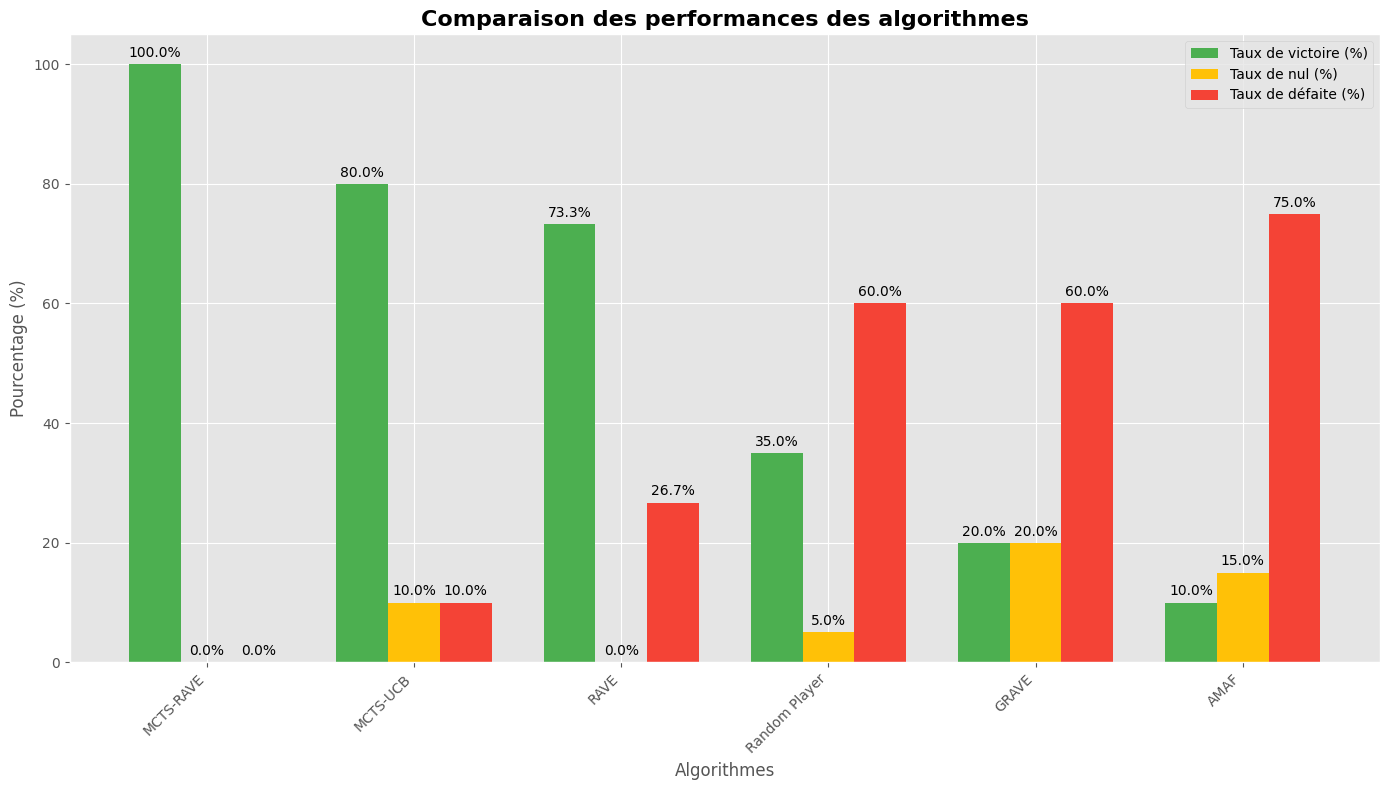

<Figure size 1000x700 with 0 Axes>

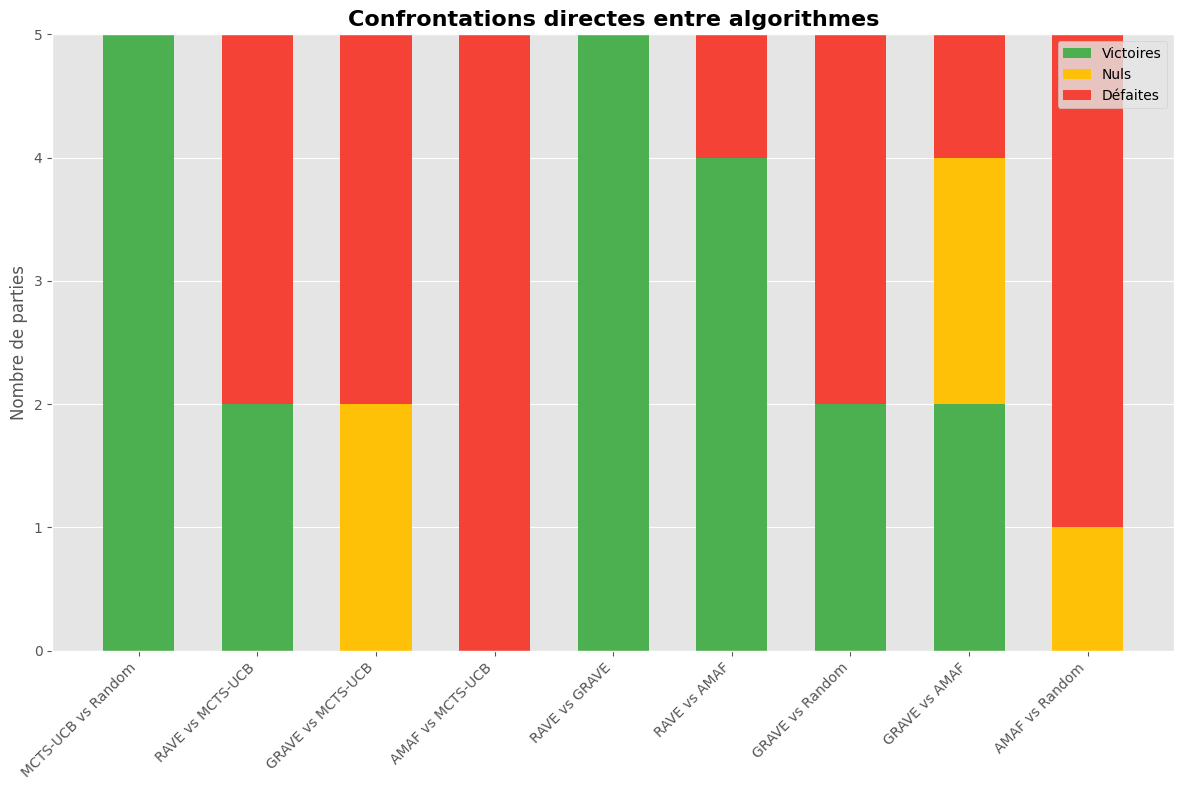

   Algorithme  Victoires  Défaites  Nuls  Total  Taux de victoire (%)  Taux de nul (%)  Taux de défaite (%)
    MCTS-RAVE          5         0     0      5                 100.0              0.0                  0.0
     MCTS-UCB         16         2     2     20                  80.0             10.0                 10.0
         RAVE         11         4     0     15                  73.3              0.0                 26.7
Random Player          7        12     1     20                  35.0              5.0                 60.0
        GRAVE          4        12     4     20                  20.0             20.0                 60.0
         AMAF          2        15     3     20                  10.0             15.0                 75.0


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Création d'un dictionnaire pour stocker les statistiques de victoire de chaque algorithme
algo_stats = {
    'MCTS-UCB': {'wins': 0, 'losses': 0, 'draws': 0, 'total_games': 0},
    'RAVE': {'wins': 0, 'losses': 0, 'draws': 0, 'total_games': 0},
    'GRAVE': {'wins': 0, 'losses': 0, 'draws': 0, 'total_games': 0},
    'AMAF': {'wins': 0, 'losses': 0, 'draws': 0, 'total_games': 0},
    'Random Player': {'wins': 0, 'losses': 0, 'draws': 0, 'total_games': 0},
    'MCTS-RAVE': {'wins': 0, 'losses': 0, 'draws': 0, 'total_games': 0}
}

# Analyser les données des tableaux fournis
# MCTS-UCB vs Random Player
algo_stats['MCTS-UCB']['wins'] += 5
algo_stats['Random Player']['losses'] += 5
algo_stats['MCTS-UCB']['total_games'] += 5
algo_stats['Random Player']['total_games'] += 5

# RAVE vs MCTS-UCB
algo_stats['RAVE']['wins'] += 2
algo_stats['MCTS-UCB']['wins'] += 3
algo_stats['RAVE']['losses'] += 3
algo_stats['MCTS-UCB']['losses'] += 2
algo_stats['RAVE']['total_games'] += 5
algo_stats['MCTS-UCB']['total_games'] += 5

# GRAVE vs MCTS-UCB
algo_stats['GRAVE']['wins'] += 0
algo_stats['MCTS-UCB']['wins'] += 3
algo_stats['GRAVE']['losses'] += 3
algo_stats['MCTS-UCB']['losses'] += 0
algo_stats['GRAVE']['draws'] += 2
algo_stats['MCTS-UCB']['draws'] += 2
algo_stats['GRAVE']['total_games'] += 5
algo_stats['MCTS-UCB']['total_games'] += 5

# AMAF vs MCTS-UCB
algo_stats['AMAF']['wins'] += 0
algo_stats['MCTS-UCB']['wins'] += 5
algo_stats['AMAF']['losses'] += 5
algo_stats['MCTS-UCB']['losses'] += 0
algo_stats['AMAF']['total_games'] += 5
algo_stats['MCTS-UCB']['total_games'] += 5

# MCTS-RAVE vs Random Player
algo_stats['MCTS-RAVE']['wins'] += 5
algo_stats['Random Player']['losses'] += 5
algo_stats['MCTS-RAVE']['total_games'] += 5
algo_stats['Random Player']['total_games'] += 5

# RAVE vs GRAVE
algo_stats['RAVE']['wins'] += 5
algo_stats['GRAVE']['losses'] += 5
algo_stats['RAVE']['total_games'] += 5
algo_stats['GRAVE']['total_games'] += 5

# RAVE vs AMAF
algo_stats['RAVE']['wins'] += 4
algo_stats['AMAF']['wins'] += 1
algo_stats['RAVE']['losses'] += 1
algo_stats['AMAF']['losses'] += 4
algo_stats['RAVE']['total_games'] += 5
algo_stats['AMAF']['total_games'] += 5

# GRAVE vs Random Player
algo_stats['GRAVE']['wins'] += 2
algo_stats['Random Player']['wins'] += 3
algo_stats['GRAVE']['losses'] += 3
algo_stats['Random Player']['losses'] += 2
algo_stats['GRAVE']['total_games'] += 5
algo_stats['Random Player']['total_games'] += 5

# GRAVE vs AMAF
algo_stats['GRAVE']['wins'] += 2
algo_stats['AMAF']['wins'] += 1
algo_stats['GRAVE']['losses'] += 1
algo_stats['AMAF']['losses'] += 2
algo_stats['GRAVE']['draws'] += 2
algo_stats['AMAF']['draws'] += 2
algo_stats['GRAVE']['total_games'] += 5
algo_stats['AMAF']['total_games'] += 5

# AMAF vs Random Player
algo_stats['AMAF']['wins'] += 0
algo_stats['Random Player']['wins'] += 4
algo_stats['AMAF']['losses'] += 4
algo_stats['Random Player']['losses'] += 0
algo_stats['AMAF']['draws'] += 1
algo_stats['Random Player']['draws'] += 1
algo_stats['AMAF']['total_games'] += 5
algo_stats['Random Player']['total_games'] += 5

# Calculer les taux pour chaque algorithme
data = []
for algo, stats in algo_stats.items():
    win_rate = (stats['wins'] / stats['total_games']) * 100 if stats['total_games'] > 0 else 0
    draw_rate = (stats['draws'] / stats['total_games']) * 100 if stats['total_games'] > 0 else 0
    loss_rate = (stats['losses'] / stats['total_games']) * 100 if stats['total_games'] > 0 else 0
    
    data.append({
        'Algorithme': algo,
        'Victoires': stats['wins'],
        'Défaites': stats['losses'],
        'Nuls': stats['draws'],
        'Total': stats['total_games'],
        'Taux de victoire (%)': round(win_rate, 1),
        'Taux de nul (%)': round(draw_rate, 1),
        'Taux de défaite (%)': round(loss_rate, 1)
    })

# Créer un DataFrame pandas avec les données
df = pd.DataFrame(data)

# Trier le DataFrame par taux de victoire décroissant
df_sorted = df.sort_values(by='Taux de victoire (%)', ascending=False)

# Configuration du style de matplotlib
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# Préparer les données pour le graphique
algos = df_sorted['Algorithme'].tolist()
win_rates = df_sorted['Taux de victoire (%)'].tolist()
draw_rates = df_sorted['Taux de nul (%)'].tolist()
loss_rates = df_sorted['Taux de défaite (%)'].tolist()

# Positions des barres
x = np.arange(len(algos))
width = 0.25

# Créer le graphique à barres groupées
fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - width, win_rates, width, label='Taux de victoire (%)', color='#4CAF50')
bar2 = ax.bar(x, draw_rates, width, label='Taux de nul (%)', color='#FFC107')
bar3 = ax.bar(x + width, loss_rates, width, label='Taux de défaite (%)', color='#F44336')

# Ajouter des éléments au graphique
ax.set_title('Comparaison des performances des algorithmes', fontsize=16, fontweight='bold')
ax.set_xlabel('Algorithmes', fontsize=12)
ax.set_ylabel('Pourcentage (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(algos, rotation=45, ha='right')
ax.legend()

# Ajouter les valeurs sur les barres
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()

# Créer un deuxième graphique pour montrer les performances tête-à-tête
plt.figure(figsize=(10, 7))

# Préparer les données de tête-à-tête (simplifié pour démonstration)
head_to_head = {
    'MCTS-UCB vs Random': [5, 0, 0],
    'RAVE vs MCTS-UCB': [2, 0, 3],
    'GRAVE vs MCTS-UCB': [0, 2, 3],
    'AMAF vs MCTS-UCB': [0, 0, 5],
    'RAVE vs GRAVE': [5, 0, 0],
    'RAVE vs AMAF': [4, 0, 1],
    'GRAVE vs Random': [2, 0, 3],
    'GRAVE vs AMAF': [2, 2, 1],
    'AMAF vs Random': [0, 1, 4]
}

# Créer une figure avec subplots pour les confrontations directes
fig, ax = plt.subplots(figsize=(12, 8))
categories = list(head_to_head.keys())
wins = [head_to_head[match][0] for match in categories]
draws = [head_to_head[match][1] for match in categories]
losses = [head_to_head[match][2] for match in categories]

width = 0.6
x = np.arange(len(categories))

# Créer un graphique empilé
p1 = ax.bar(x, wins, width, label='Victoires', color='#4CAF50')
p2 = ax.bar(x, draws, width, bottom=wins, label='Nuls', color='#FFC107')
p3 = ax.bar(x, losses, width, bottom=[wins[i] + draws[i] for i in range(len(wins))], 
         label='Défaites', color='#F44336')

ax.set_title('Confrontations directes entre algorithmes', fontsize=16, fontweight='bold')
ax.set_ylabel('Nombre de parties', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()

# Afficher les deux graphiques
plt.show()

# Afficher également le tableau de données pour référence
print(df_sorted.to_string(index=False))

# Enregistrer les graphiques (facultatif)
fig.savefig('comparaison_algos.png', dpi=300, bbox_inches='tight')